# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'> Insurance Analytics and Prediction<br></div>

# <div style='padding:5px;background-color:maroon;color:white;border-radius:2px;font-size:100%;text-align: center'>EDA before Handling Outliers and Skewness<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [1]:
import pandas as pd

pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option("display.float_format", "{:.4f}".format)


import numpy as np
from scipy.stats import kstest, skew, kurtosis
import scipy.stats as stats

import seaborn as sns

sns.set_theme(
    context="notebook",
    style="white",
    palette="dark",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None,
)
sns.set_style({"axes.facecolor": "white", "axes.edgecolor": "white"})

import matplotlib.pyplot as plt

plt.rcParams.update(
    {
        "text.color": "black",  # Change font color
        "axes.labelcolor": "black",  # Change axis label color
        "xtick.color": "black",  # Change x-tick color
        "ytick.color": "black",  # Change y-tick color
        "font.weight": "bold",  # Change font weight
        "axes.titleweight": "bold",  # Change title weight
        "axes.labelweight": "bold",  # Change label weight
    }
)


color_good = "\033[32m"  # Dark Green for near-zero skew
color_okay = "\033[92m"  # Light Green for slightly positive or slightly negative skew
color_bad = "\033[91m"  # Maroon for significant skew
color_neutral = "\033[0m"  # Reset color

### <span style="color:Khaki;">Reading cleaned Dataset:

In [2]:
df = pd.read_feather("Cleaned_data.feather")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int16         
 1   age                          1000 non-null   int8          
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   category      
 4   policy_deductable            1000 non-null   int16         
 5   policy_annual_premium        1000 non-null   float64       
 6   insured_sex                  1000 non-null   category      
 7   insured_education_level      1000 non-null   category      
 8   insured_occupation           1000 non-null   category      
 9   insured_hobbies              1000 non-null   category      
 10  insured_relationship         1000 non-null   category      
 11  incident_date                1000 non-null  

In [4]:
df.sample(3)

months_as_customer  age policy_bind_date policy_state  policy_deductable  \
41                  116   34       2012-08-30           IN                500   
27                  202   34       2002-07-18           IN                500   
514                 479   60       1997-07-07           IL               2000   

     policy_annual_premium insured_sex insured_education_level  \
41               1737.6600        MALE               Associate   
27                848.0700        MALE                      JD   
514              1304.8300      FEMALE                 College   

    insured_occupation insured_hobbies insured_relationship incident_date  \
41    transport-moving           chess            unmarried    2015-01-01   
27     exec-managerial           chess        not-in-family    2015-01-07   
514      other-service       cross-fit              husband    2015-01-09   

                incident_type  collision_type incident_severity  \
41   Single Vehicle Collision  Side Collision      Major Damage   
27              Vehicle Theft          Others      Minor Damage   
514  Single Vehicle Collision  Rear Collision        Total Loss   

    authorities_contacted incident_state incident_city  \
41                 Police             WV    Northbrook   
27                  Other             VA    Northbrook   
514             Ambulance             NY     Arlington   

    incident_hour_of_the_day number_of_vehicles_involved property_damage  \
41                         1                           1             YES   
27                         5                           1             YES   
514                       18                           1              NO   

    bodily_injuries witnesses police_report_available  total_claim_amount  \
41                1         1                      NO               97080   
27                2         1                      NO                5720   
514               0         0                      NO               60600   

     injury_claim  property_claim  vehicle_claim auto_make auto_year  \
41          16180           16180          64720       BMW      2001   
27           1040             520           4160    Suburu      2003   
514          5050           10100          45450     Honda      2001   

    fraud_reported  
41               Y  
27               Y  
514              N

## <span style="color:Aqua;">Defining variable type:

<span style="color: Chartreuse;"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#9784; </span> On a high level we can categorize data into two types <span style="color: Chartreuse;"> Continuous and Categorial </span> In this section we are gonna split features based on the nature of it's type.<br>



   <span style="color: Chartreuse;font-size:130%;"> &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&#9830; </span> Continuous variables can take any value within a range and can habe infinite possible values. 
      <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;Example - `annual_income`, `age`, `Num of bank accounts`, etc. </p>

   <span style="color: Chartreuse;font-size:130%;"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9830; </span> Continuous Categorial variables have categories with specific order or ranking or represent categories without any inherent or order or ranking. 
      <p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;- Example - `credit_mix`,`name`, etc.</p>

In [5]:
continuous = [
    "age",
    "policy_deductable",
    "policy_annual_premium",
    "total_claim_amount",
    "injury_claim",
    "property_claim",
    "vehicle_claim",
]

categorical = [
    "policy_state",
    "insured_sex",
    "insured_education_level",
    "insured_occupation",
    "insured_hobbies",
    "insured_relationship",
    "incident_type",
    "collision_type",
    "incident_severity",
    "authorities_contacted",
    "incident_state",
    "incident_city",
    "incident_hour_of_the_day",
    "number_of_vehicles_involved",
    "property_damage",
    "bodily_injuries",
    "witnesses",
    "police_report_available",
    "auto_make",
    "auto_year",
    "fraud_reported",
]

In [6]:
print(len(continuous), "+", len(categorical), len(continuous) + len(categorical))
print(df.shape[1] - 3)  # removing 3 time columns

7 + 21 28
28


## <p style="color:Aqua;"> Exploratory Data Analysis. Before Handling Skewness, Kurtosis and Outliers</p>

### <p style="color:Khaki;">Before we move further it's crucial to understand the importance of handling <span style="color: Chartreuse;"> Outliers, Normality, Skewness, and Kurtosis </span> and their impact on the ML model performance.

#### <span style="color: Tomato;font-size:130%;"><u> Outliers</u>:- </span> 
Outliers are data points that are significantly different from most other data points in a variable (column). Example, most people in a dataset have an annual income between $20,000 and $100,000, but one person has an income of $1,000,000, that person is an outlier.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9830; </span> <span style="color: Tomato;font-size:110%;"> Example:- </span> Most people in a dataset have an annual income between $20,000 and $100,000, but one person has an income of $1,000,000, that person is an outlier.

<span style="color: Chartreuse;font-size:120%;"> &nbsp; &nbsp;&nbsp;&nbsp;&#9830; </span> <span style="color: Tomato;font-size:110%;"> Impact on Model:- </span> Outliers can skew the results of our analysis and make our model less accurate. For example, if we're predicting loan approval, an outlier income might distort the overall understanding of what typical incomes look like, leading to poor predictions.

#### <span style="color: Tomato;font-size:130%;"> <u>Normality</u>:- 
</span>Normality refers to how data is distributed. In a "normal" distribution, data is symmetrically distributed around the mean (average), forming a bell-shaped curve when we plot a line chart.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9830; </span> <span style="color: Tomato;font-size:110%;"> Example:- </span> Imagine measuring the height of adults in a city. Most people would fall around the average height, with fewer people being extremely short or extremely tall, forming a bell curve.

<span style="color: Chartreuse;font-size:120%;"> &nbsp; &nbsp;&nbsp;&nbsp;&#9830; </span> <span style="color: Tomato;font-size:110%;"> Impact on Model:- </span> Many statistical models assume that the data follows a normal distribution. If our data is not normally distributed, the model might not perform as well, leading to inaccurate predictions.

#### <span style="color: Tomato;font-size:130%;"> <u>Skewness</u>:- 
</span>Skewness measures the asymmetry of the data distribution. If data is skewed, it means that it is not evenly distributed around the mean.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9830; </span> <span style="color: Tomato;font-size:110%;"> <u>Types of Skewness</u>:- </span><br>

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9824; </span><span style="color: Tomato;font-size:100%;"> Positive Skew (Right Skew):- </span> Most data points are clustered on the left with a few high values stretching out to the right.<br>

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9824; </span><span style="color: Tomato;font-size:100%;"> Negative Skew (Left Skew):- </span> Most data points are clustered on the right with a few low values stretching out to the left.

<span style="color: Chartreuse;font-size:120%;"> &nbsp; &nbsp;&nbsp;&nbsp;&#9830; </span> <span style="color: Tomato;font-size:110%;"> Impact on Model:- </span> Skewed data can affect the performance of our model by giving more weight to the tail-end values, which might not be representative of the majority of our data.

#### <span style="color: Tomato;font-size:130%;"> <u>Kurtosis</u>:- 
</span>Kurtosis measures the "tailedness" of the data distribution. It tells us how much data is in the tails and the peak compared to a normal distribution.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9830; </span> <span style="color: Tomato;font-size:110%;"> <u>Types of Kurtosis</u>:- </span><br>

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9824; </span><span style="color: Tomato;font-size:100%;"> High Kurtosis:- </span> Data has heavy tails and a sharp peak, indicating more extreme values.<br>

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9824; </span><span style="color: Tomato;font-size:100%;"> Low Kurtosis:- </span> Data has light tails and a flatter peak, indicating fewer extreme values.

<span style="color: Chartreuse;font-size:120%;"> &nbsp; &nbsp;&nbsp;&nbsp;&#9830; </span> <span style="color: Tomato;font-size:110%;"> Impact on Model:- </span> High kurtosis can indicate the presence of outliers, which can affect the accuracy of our model. If the data has more extreme values than expected, our model might overestimate the variability and lead to poor predictions.

<span style="color: Chartreuse;">   &#9784; &nbsp; <span style="color: white;font-size: 120%"> Defining a function to create plots.</span></span><br>

In [7]:
def univar_num(df, col):
    plt.figure(figsize=(16, 8))
    df = df.dropna(subset=[col])

    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    sns.set_style({"axes.facecolor": "white", "axes.edgecolor": "white"})
    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x=col, kde=True, bins=50, color="maroon", fill=True)
    plt.title(
        f"Histogram for {col}",
        fontdict={"fontsize": 24, "color": "black", "fontweight": "bold"},
    )
    plt.axvline(mean, color="maroon", label="Mean")
    plt.axvline(median, color="black", label="Median")
    plt.axvline(mode, color="darkgreen", label="Mode")
    sns.set_theme(
        context="notebook",
        style="white",
        palette="dark",
        font="sans-serif",
        font_scale=1,
        color_codes=True,
        rc=None,
    )

    plt.legend()
    plt.tight_layout()

    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, x=col, color="lightgrey", legend=True)
    plt.xticks(rotation=45)
    plt.title(
        f"Box Plot for {col}",
        fontdict={"fontsize": 24, "color": "black", "fontweight": "bold"},
    )
    plt.axvline(mean, color="maroon", label="Mean")
    plt.axvline(median, color="black", label="Median")
    plt.axvline(mode, color="darkgreen", label="Mode")
    plt.legend()
    plt.tight_layout()

    plt.subplot(2, 3, 3)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.gca().get_lines()[1].set_color("maroon")
    plt.gca().get_lines()[0].set_color("darkgreen")
    plt.title(
        f"QQ Plot for {col}",
        fontdict={"fontsize": 24, "color": "black", "fontweight": "bold"},
    )

    plt.tight_layout()

    plt.tight_layout()
    plt.show()

<span style="color: Chartreuse;">   &#9784; &nbsp; <span style="color: white;font-size: 120%"> Defining a function to show Kurtosis and Skewness value.</span></span><br>

In [8]:
def kurtosis_color(kurt_val):
    if -1 <= kurt_val <= 1:
        kurt_color = color_good  # Dark Green for near-zero kurtosis (good)
    elif 1 < kurt_val <= 3 or -3 <= kurt_val < -1:
        kurt_color = color_okay  # Yellow for moderate kurtosis
    else:  # kurt_val > 3 or kurt_val < -3
        kurt_color = color_bad  # Maroon for extreme kurtosis
    return kurt_color


def skewness_color(skew_val):
    if -0.5 <= skew_val <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skew_val <= 0.5 or -0.5 < skew_val < 0:
        color = (
            color_okay  # Light Green for slightly positive or slightly negative skew
        )
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
    return color

<span style="color: Chartreuse;">   &#9784; &nbsp; <span style="color: white;font-size: 120%"> Defining a function to to plot</span></span><br>

In [9]:
def process_column(col):
    univar_num(df, col)
    skew_val = df[col].skew()
    kurt = df[col].kurtosis()

    kurt_color = kurtosis_color(kurt)
    color = skewness_color(skew_val)

    skewed_col.append(col)

    print(f"\n\n{color}Skew for {col} is {skew_val:.4f}{color_neutral}")
    print(f"{color}Kurtosis for {col} is {kurt:.4f}{color_neutral}\n\n")


### <span style="color:Khaki;"> Descrptive Statistics:

In [10]:
df.describe().T

count                           mean  \
months_as_customer    1000.0000                       203.9540   
age                   1000.0000                        38.9480   
policy_bind_date           1000  2002-02-08 04:40:47.999999872   
policy_deductable     1000.0000                      1136.0000   
policy_annual_premium 1000.0000                      1256.4061   
incident_date              1000            2015-01-30 08:02:24   
total_claim_amount    1000.0000                     52761.9400   
injury_claim          1000.0000                      7433.4200   
property_claim        1000.0000                      7399.5700   
vehicle_claim         1000.0000                     37928.9500   

                                       min                  25%  \
months_as_customer                  0.0000             115.7500   
age                                19.0000              32.0000   
policy_bind_date       1990-01-08 00:00:00  1995-09-19 00:00:00   
policy_deductable                 500.0000             500.0000   
policy_annual_premium             433.3300            1089.6075   
incident_date          2015-01-01 00:00:00  2015-01-15 00:00:00   
total_claim_amount                100.0000           41812.5000   
injury_claim                        0.0000            4295.0000   
property_claim                      0.0000            4445.0000   
vehicle_claim                      70.0000           30292.5000   

                                       50%                  75%  \
months_as_customer                199.5000             276.2500   
age                                38.0000              44.0000   
policy_bind_date       2002-04-01 12:00:00  2008-04-21 12:00:00   
policy_deductable                1000.0000            2000.0000   
policy_annual_premium            1257.2000            1415.6950   
incident_date          2015-01-31 00:00:00  2015-02-15 00:00:00   
total_claim_amount              58055.0000           70592.5000   
injury_claim                     6775.0000           11305.0000   
property_claim                   6750.0000           10885.0000   
vehicle_claim                   42100.0000           50822.5000   

                                       max        std  
months_as_customer                479.0000   115.1132  
age                                64.0000     9.1403  
policy_bind_date       2015-02-22 00:00:00        NaN  
policy_deductable                2000.0000   611.8647  
policy_annual_premium            2047.5900   244.1674  
incident_date          2015-03-01 00:00:00        NaN  
total_claim_amount             114920.0000 26401.5332  
injury_claim                    21450.0000  4880.9519  
property_claim                  23670.0000  4824.7262  
vehicle_claim                   79560.0000 18886.2529

#### <span style="color:Khaki;"> Observations and insights from above statistical information:</span>

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Months as Customer -**</span>   Max value is 479 with the std of 115. Which may be usual but need to check.

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Policy Deductable: -**</span> The policy_deductable has a mean of 1136, with quartiles at 500, 1000, and 2000. This indicates that policy deductibles are often clustered around these specific values, likely representing standard policy tiers.
   
   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Policy Annual Premium: -**</span> The policy_annual_premium has a mean of approximately 1256. The range is relatively broad, with a minimum of 433 and a maximum of 2047. The standard deviation of 244 suggests some variation, but most premiums are centered around the mean.

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Total Claim Amount: -**</span> The total_claim_amount has a wide range, with a minimum of 100 and a maximum of 114,920. The high standard deviation (26,401) indicates significant variability in claim amounts, which could be due to different types or severities of incidents.

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Claims Breakdown (Injury, Property, Vehicle): -**</span> Injury_claim, property_claim, and vehicle_claim each have considerable variation, as indicated by their respective standard deviations. The highest mean and variability are seen in vehicle_claim, which could suggest that vehicle-related claims are generally larger and more variable than other types.

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Age: -**</span> The age distribution seems fairly normal, with a mean of about 39 years and a standard deviation of approximately 9 years. This suggests that most policyholders are in their late 30s to early 40s.

### <span style="color:Khaki;">Checking Month as Customer datapoints realibility:

In [11]:
for i in np.arange(120, 500, 50):
    print(
        i, "-----", "Average age is ", df[df["months_as_customer"] > i]["age"].median()
    )

120 ----- Average age is  41.0
170 ----- Average age is  43.0
220 ----- Average age is  46.0
270 ----- Average age is  49.0
320 ----- Average age is  55.0
370 ----- Average age is  57.0
420 ----- Average age is  59.0
470 ----- Average age is  61.0


<span style="color:Chartreuse;font-size:120%;"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#9784; </span> Per the output above age is increasing when moth is also increasing. So the datapoints might be real or true. </span>

### <span style="color:Khaki;">Ploting Continuous features Distribution:

<span style="color: Chartreuse;">   &#9784; &nbsp; <span style="color: white;font-size: 120%"> The below code plots Histogram, Box plot, and Q-Q plots for all Conntimuos Features:</span></span><br>

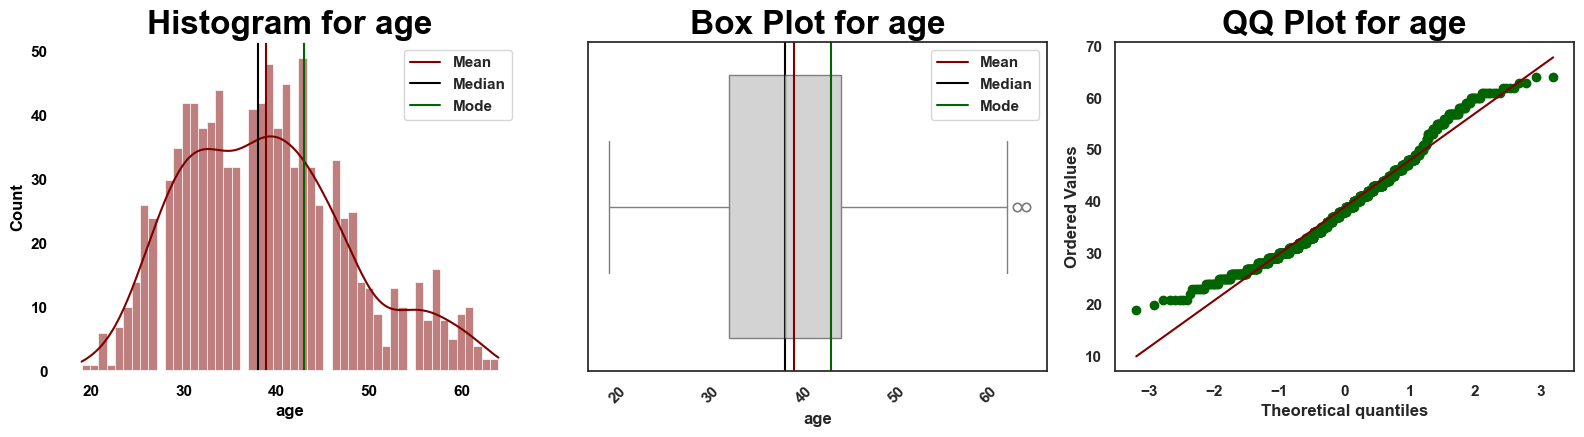



Skew for age is 0.4790
Kurtosis for age is -0.2603




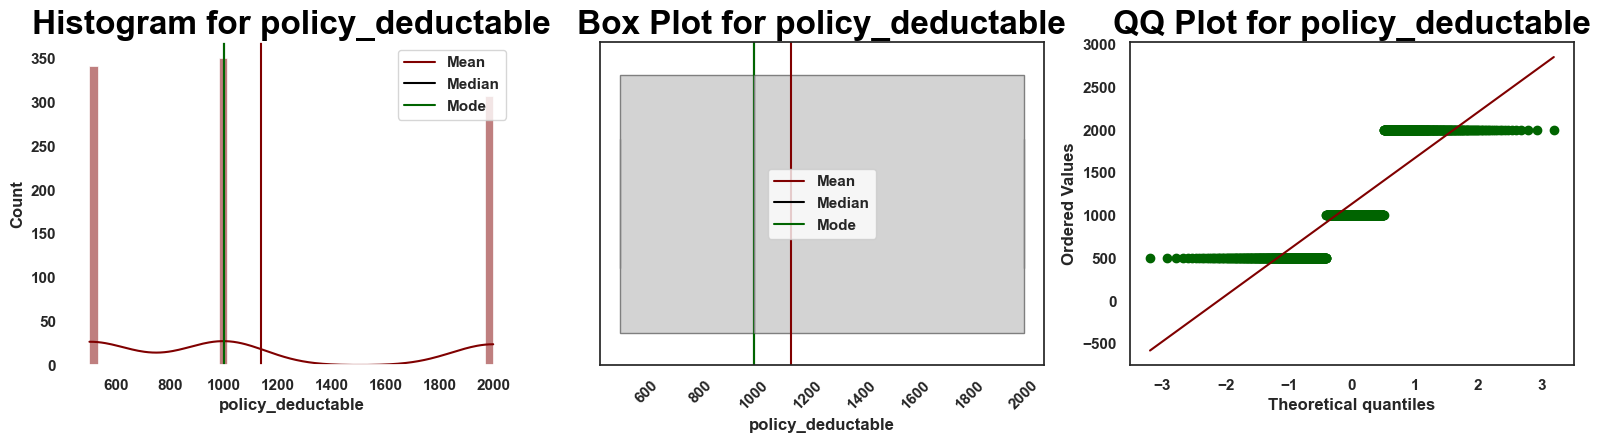



Skew for policy_deductable is 0.4779
Kurtosis for policy_deductable is -1.3769




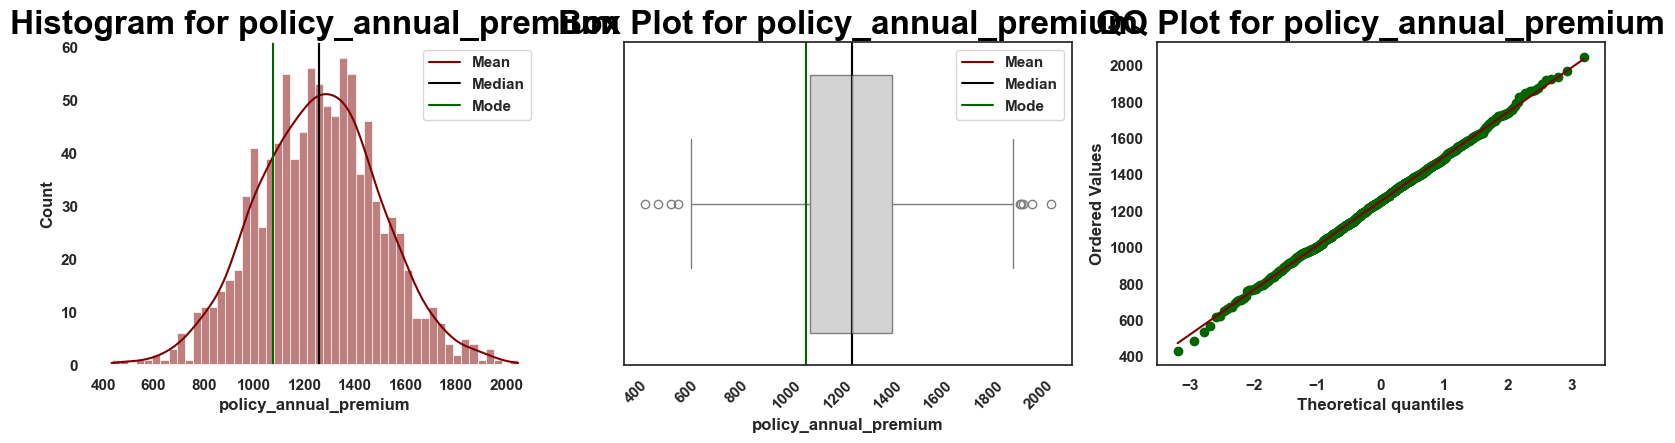



Skew for policy_annual_premium is 0.0044
Kurtosis for policy_annual_premium is 0.0739




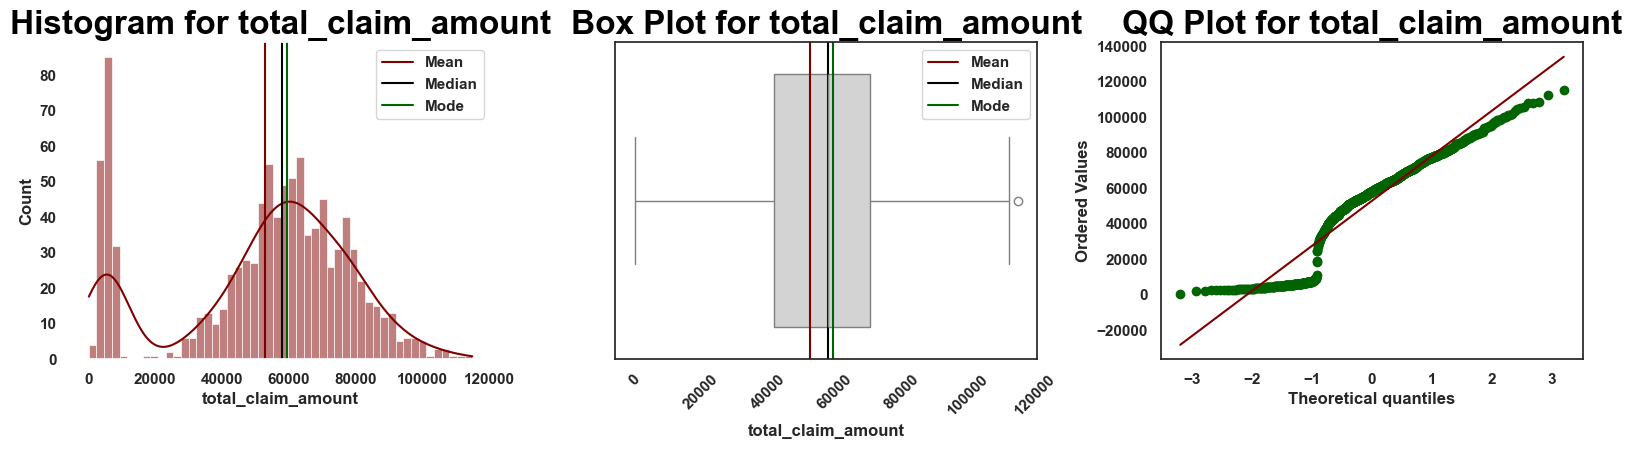



Skew for total_claim_amount is -0.5946
Kurtosis for total_claim_amount is -0.4541




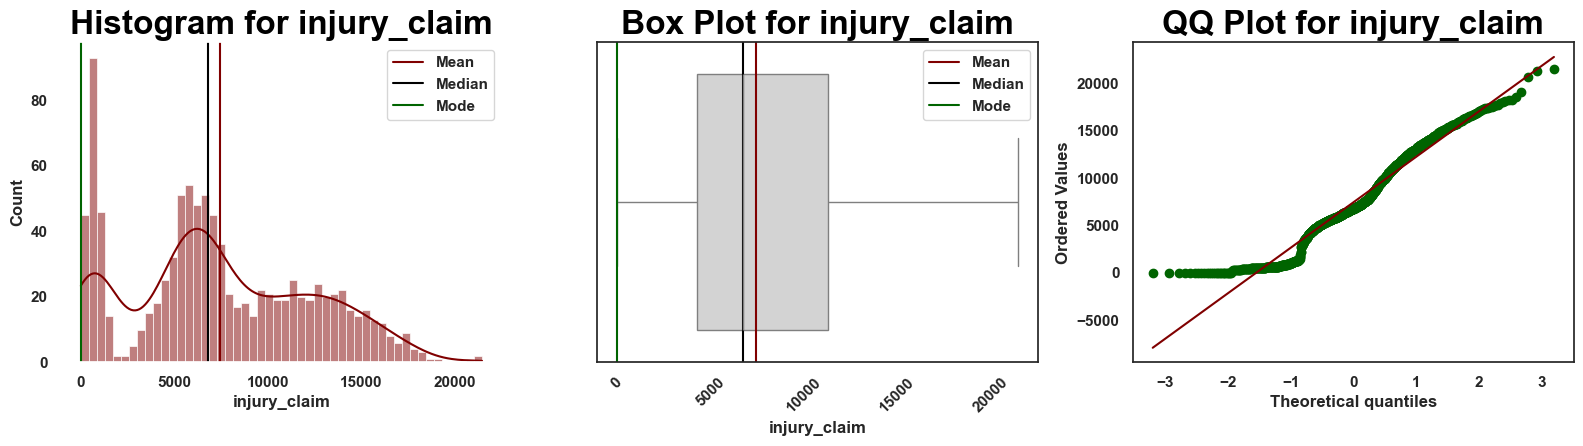



Skew for injury_claim is 0.2648
Kurtosis for injury_claim is -0.7631




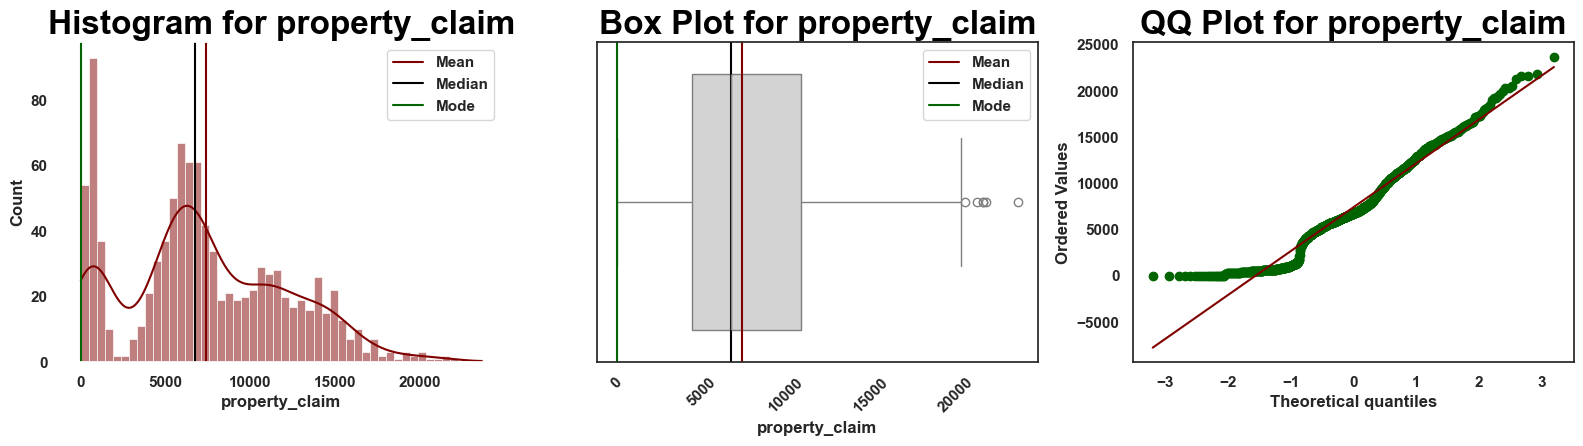



Skew for property_claim is 0.3782
Kurtosis for property_claim is -0.3764




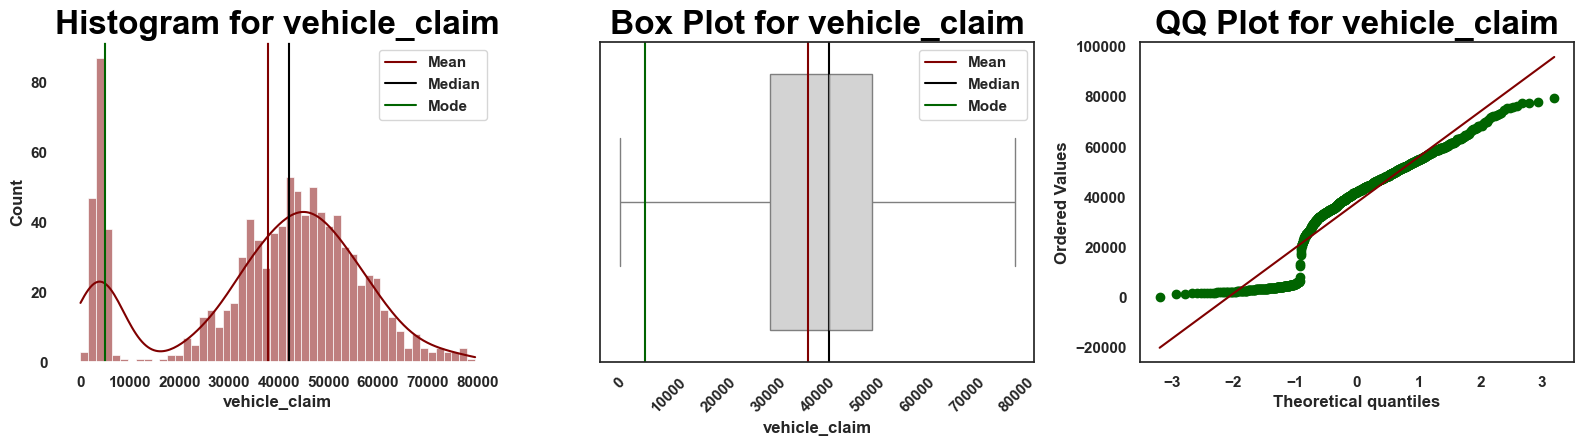



Skew for vehicle_claim is -0.6211
Kurtosis for vehicle_claim is -0.4466




In [12]:
skewed_col = []

_ = list(
    map(process_column, continuous)
)  # Apply the function to each column in the continuous list


#### <span style="color:Khaki;"> Observations and insights from plots above:</span>

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Histogram (First Plot) -**</span> A histogram is like a bar chart showing how often different values occur in your data. A smooth line (KDE) estimating the shape of data distribution.

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Box-and-Whisker plot, (Second Plot) -**</span> The "box" represents the middle 50% of your data. The line in the middle of the box is the median. The "whiskers" extend to show the rest of the distribution.Points beyond the whiskers are potential outliers.

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Q-Q Plot (Quantile-Quantile (Third plot)): -**</span> This plot compares your data's distribution to a theoretical normal distribution. It show how closely your data follows a normal distribution and Where and how your data deviates from normality.
   



   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Observations: -**</span> 
      - All features are good except Policy deductable. It seems to be a discrete variable as the data ponints are falls between limitted values. 
      - We have minor outliers on `age`,`policy annual premium`,`Total claim`, and `Property Claim`.

<span style="color: Chartreuse;font-size: 130%">&#9784; &nbsp;</span> <span style="color: Tomato;font-size: 130%"> <b>We will need to use appropriate techniques like normalizing, capping outliers to certain percentile, etc, to address these issues</b></span>

### <span style="color:Khaki;">Statistival Test for Normality, Skew, Kurtosis:

Performing statustival test to confirm normality.

In [13]:
for var in continuous:
    stat, p = kstest(df[var], "norm", args=(df[var].mean(), df[var].std()))
    print(f"K-S Test for {var}: Statistics={stat}, p={p}")
    if p > 0.05:
        print(f"{var} looks normally distributed.\n")
    else:
        print(f"{var} does not look normally distributed.\n")


K-S Test for age: Statistics=0.06586326713162294, p=0.0003245057348046505
age does not look normally distributed.

K-S Test for policy_deductable: Statistics=0.2809486814746704, p=2.61725029571265e-70
policy_deductable does not look normally distributed.

K-S Test for policy_annual_premium: Statistics=0.011773942121742431, p=0.9988495433150195
policy_annual_premium looks normally distributed.

K-S Test for total_claim_amount: Statistics=0.12791239761192147, p=1.0078101660274144e-14
total_claim_amount does not look normally distributed.

K-S Test for injury_claim: Statistics=0.08549045300317659, p=8.30050622498833e-07
injury_claim does not look normally distributed.

K-S Test for property_claim: Statistics=0.07829325958481936, p=8.870015247047102e-06
property_claim does not look normally distributed.

K-S Test for vehicle_claim: Statistics=0.1286373422101301, p=6.925657956506968e-15
vehicle_claim does not look normally distributed.



In [14]:
for var in continuous:
    skewness = skew(df[var])
    kurt = kurtosis(df[var])
    print(f"{var} - Skewness: {skewness}, Kurtosis: {kurt}")
    if abs(skewness) < 0.5 and abs(kurt) < 3:
        print(f"{var} looks normally distributed.\n")
    else:
        print(f"{var} does not look normally distributed.\n")

age - Skewness: 0.478269265444348, Kurtosis: -0.2649495664444954
age looks normally distributed.

policy_deductable - Skewness: 0.47717008402692257, Kurtosis: -1.3760622615437708
policy_deductable looks normally distributed.

policy_annual_premium - Skewness: 0.004395388781646907, Kurtosis: 0.06752650386986625
policy_annual_premium looks normally distributed.

total_claim_amount - Skewness: -0.593689743653387, Kurtosis: -0.45780820186136495
total_claim_amount does not look normally distributed.

injury_claim - Skewness: 0.2644134965313636, Kurtosis: -0.7652709695781823
injury_claim looks normally distributed.

property_claim - Skewness: 0.37760128674511556, Kurtosis: -0.3805010189907647
property_claim looks normally distributed.

vehicle_claim - Skewness: -0.6201658958678784, Kurtosis: -0.4503371882802707
vehicle_claim does not look normally distributed.



<span style="color: Chartreuse;font-size: 130%">&#9784; &nbsp;</span> <span style="color: Tomato;font-size: 130%"> <b>Above are the another way of checking distribution and Skewness, it representing the same results as plots.</b></span>

### <span style="color:Khaki;">Categorical features Distribution

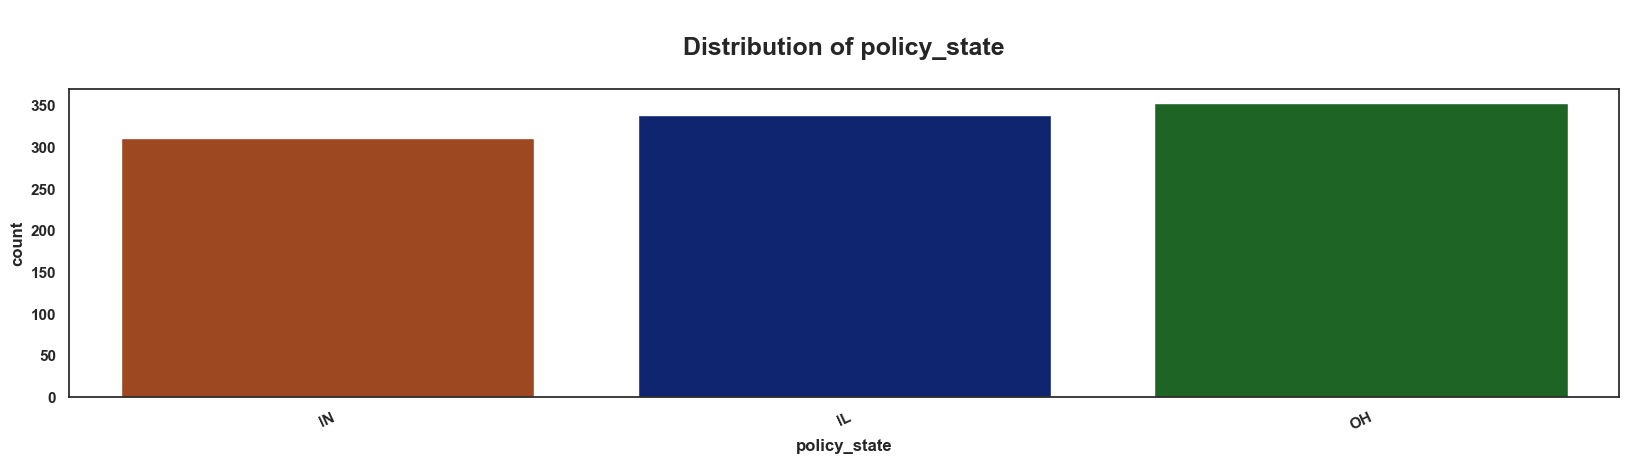

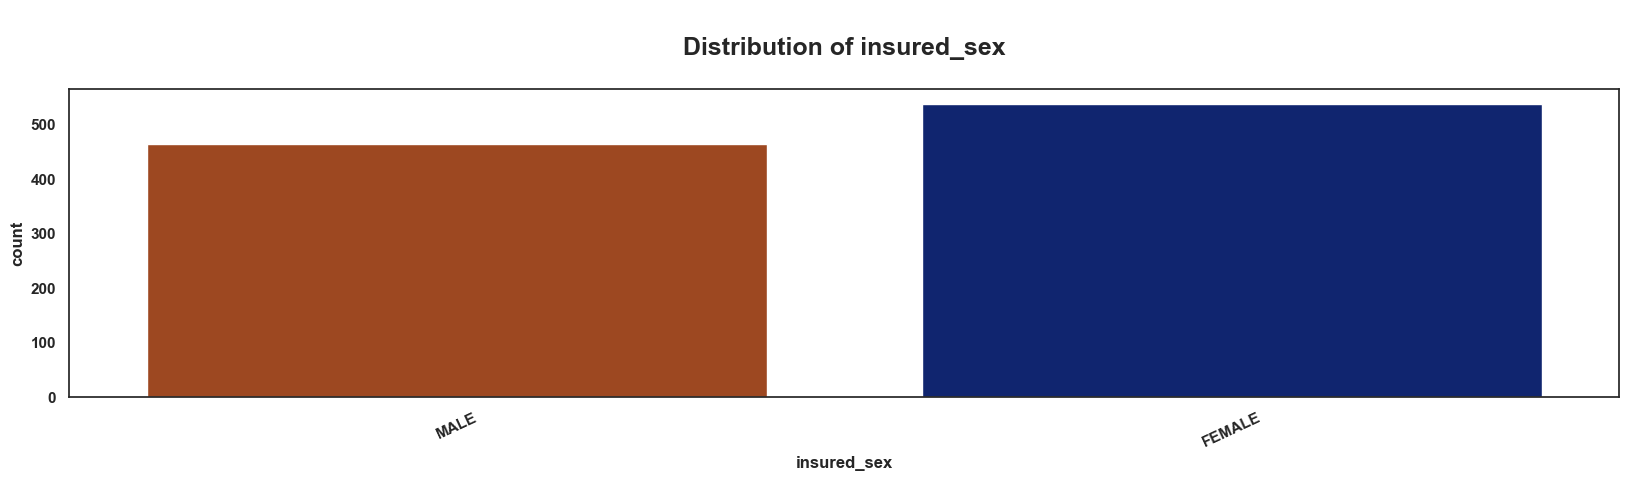

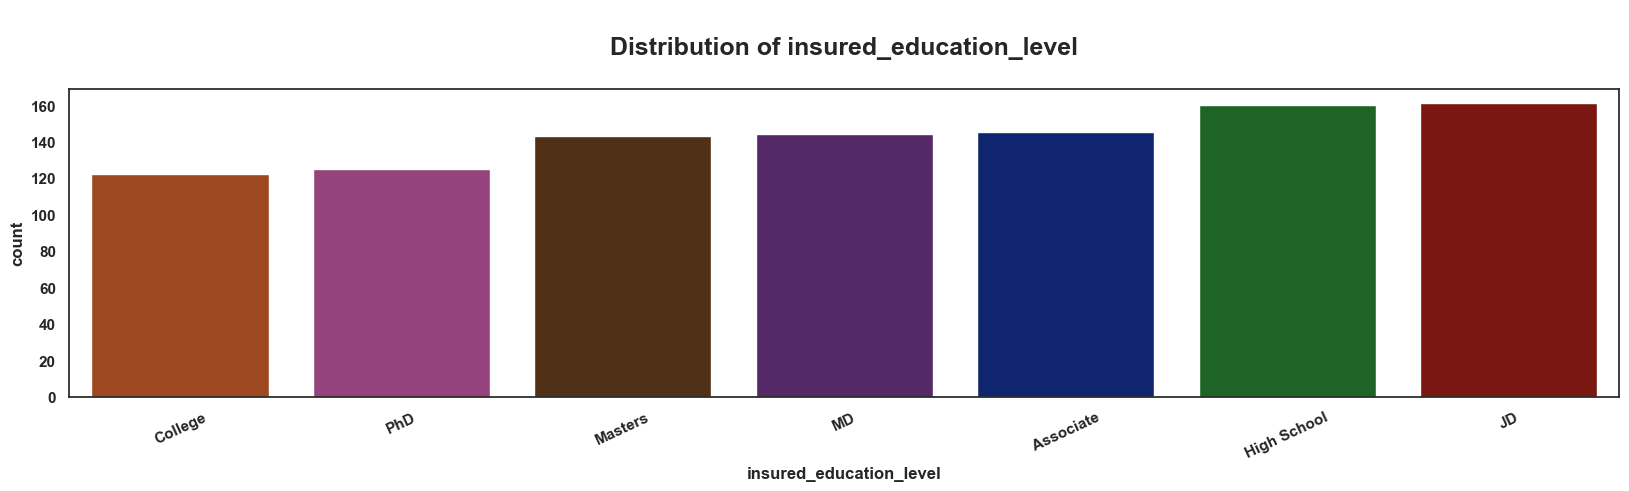

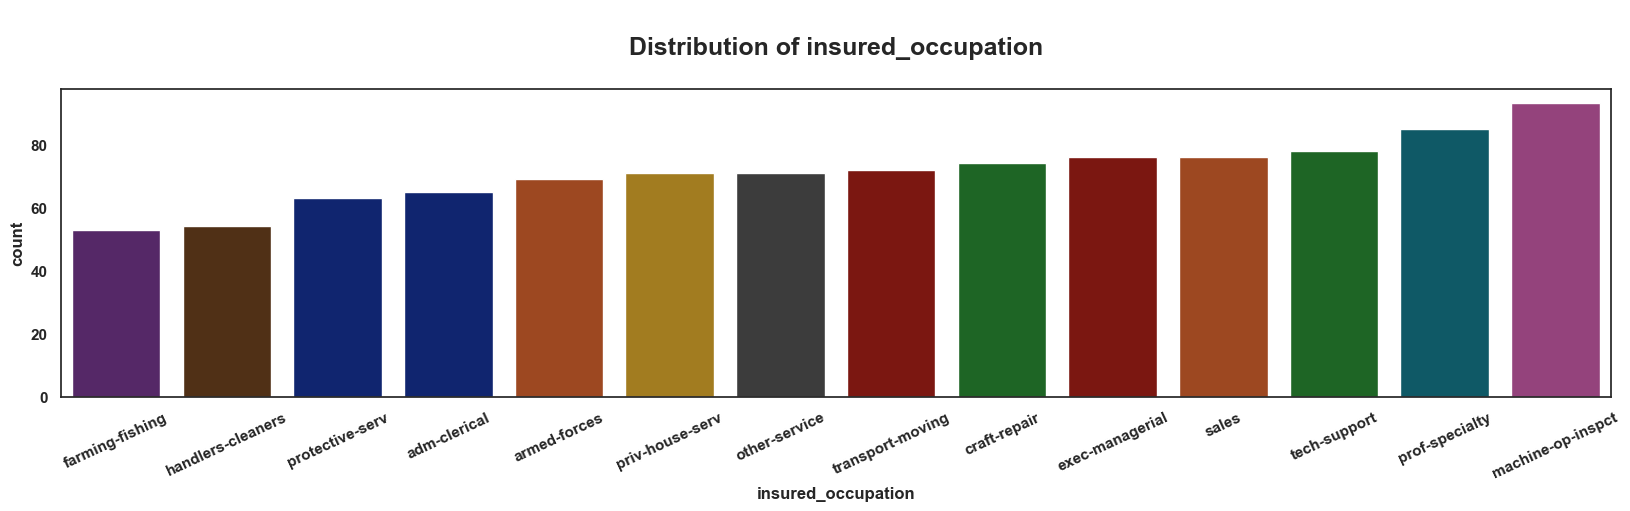

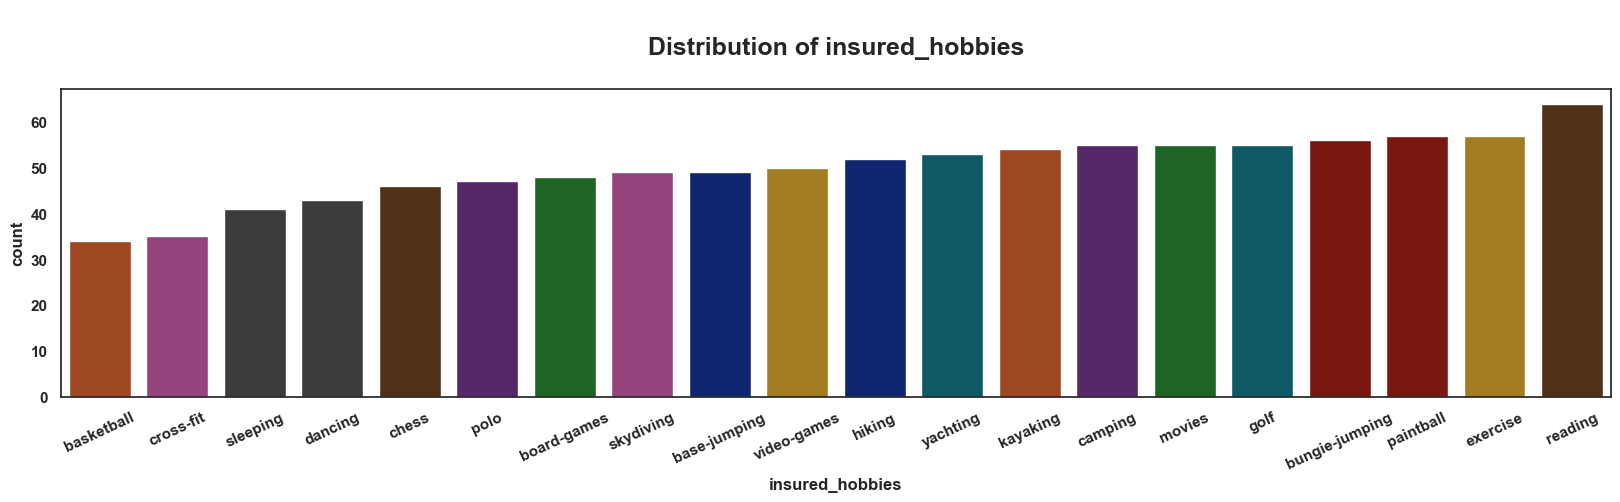

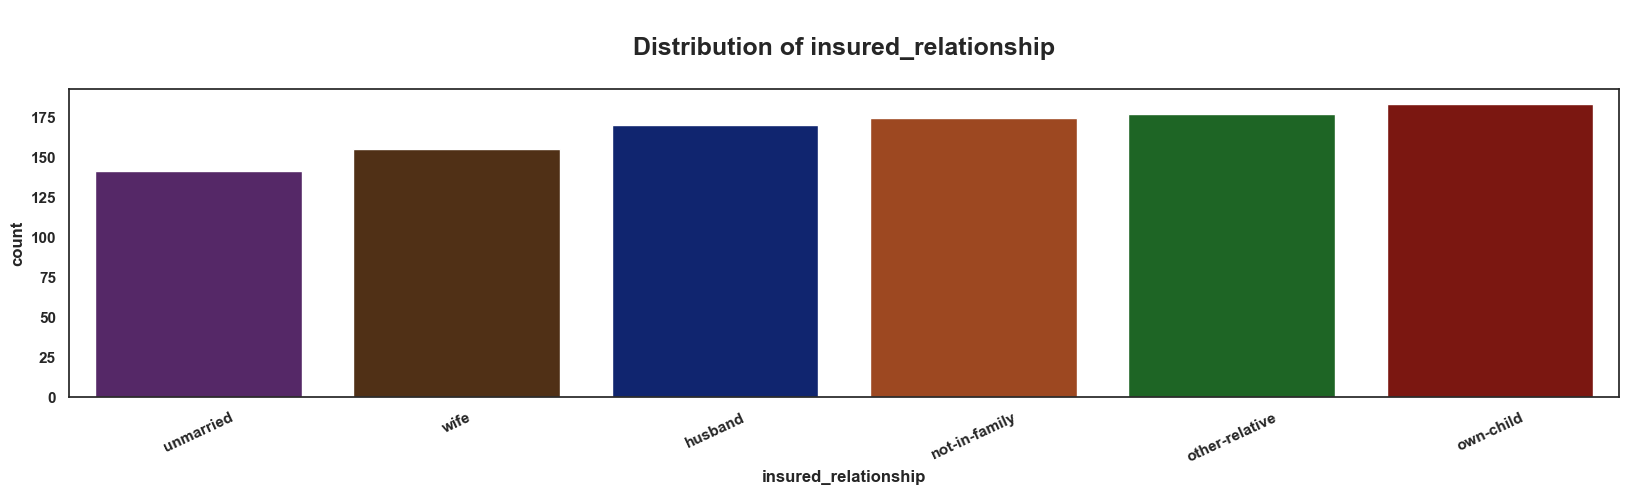

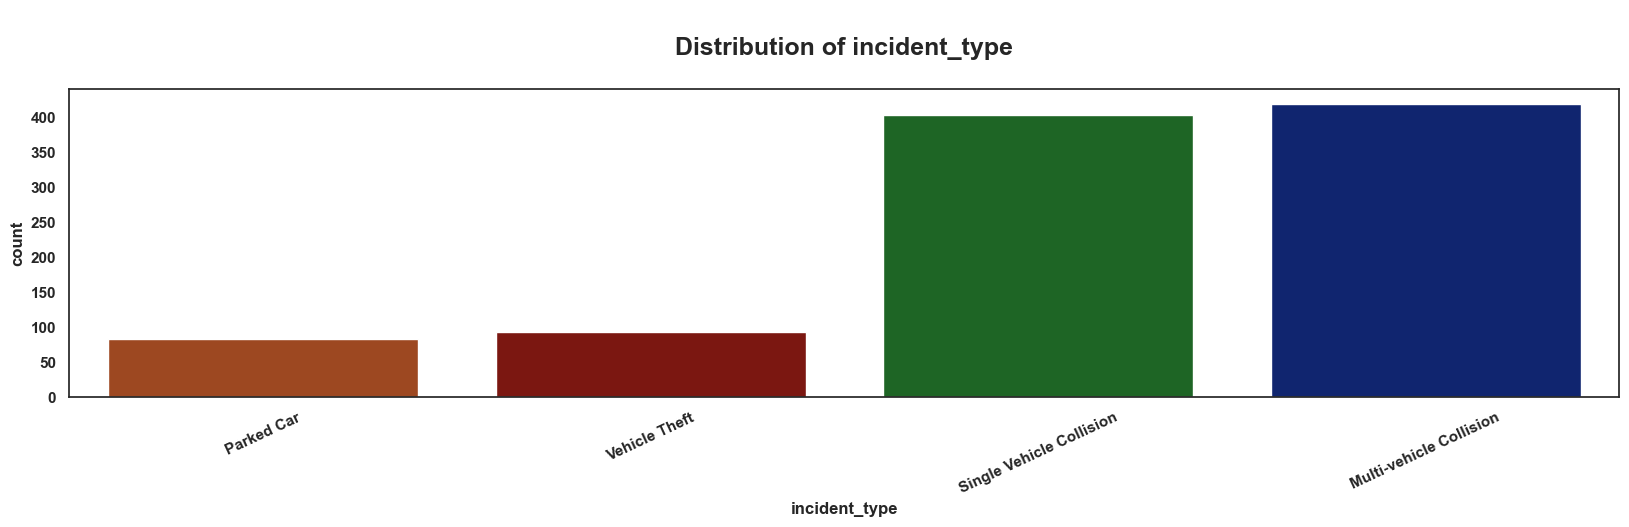

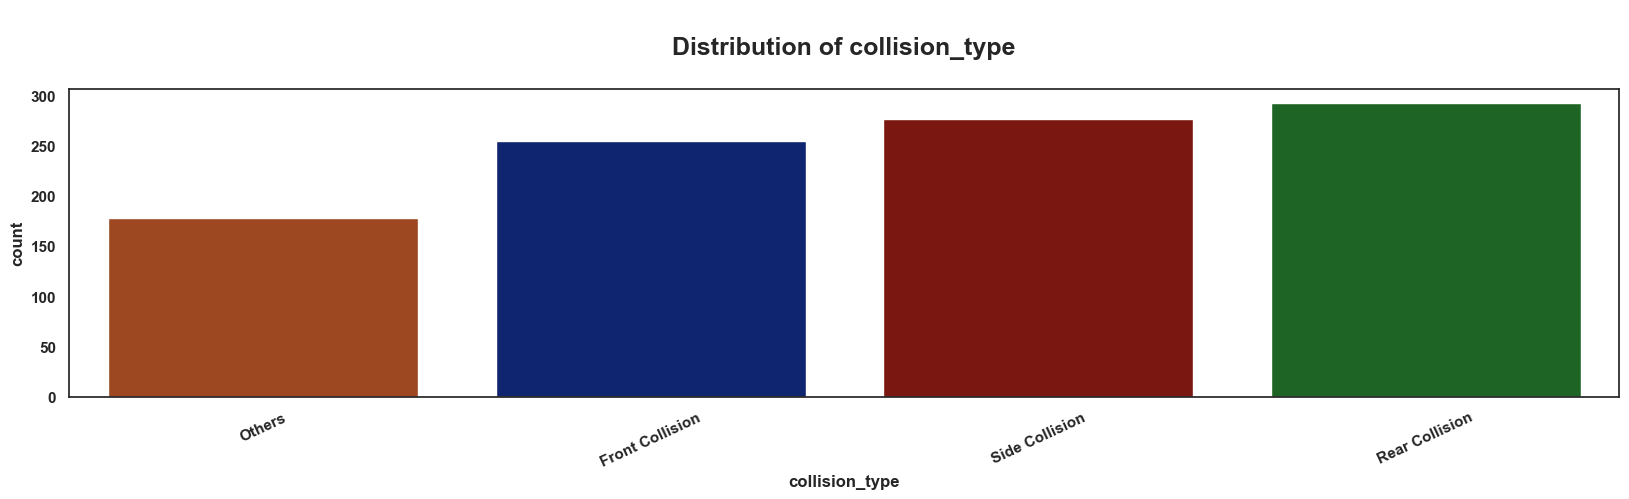

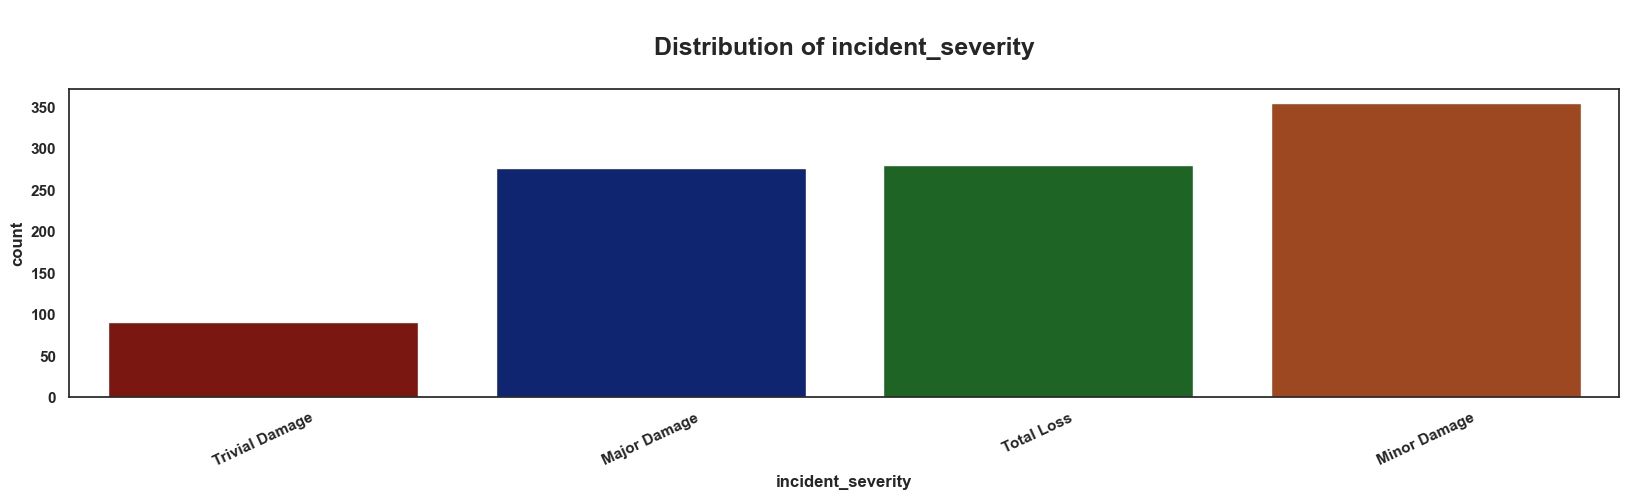

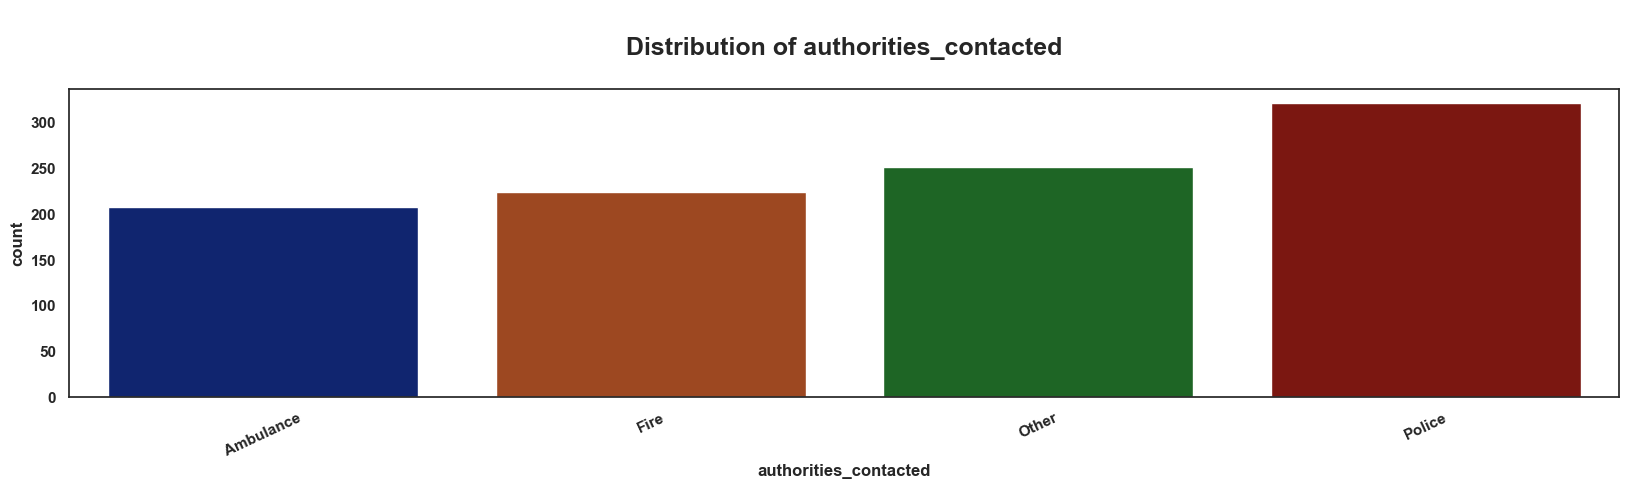

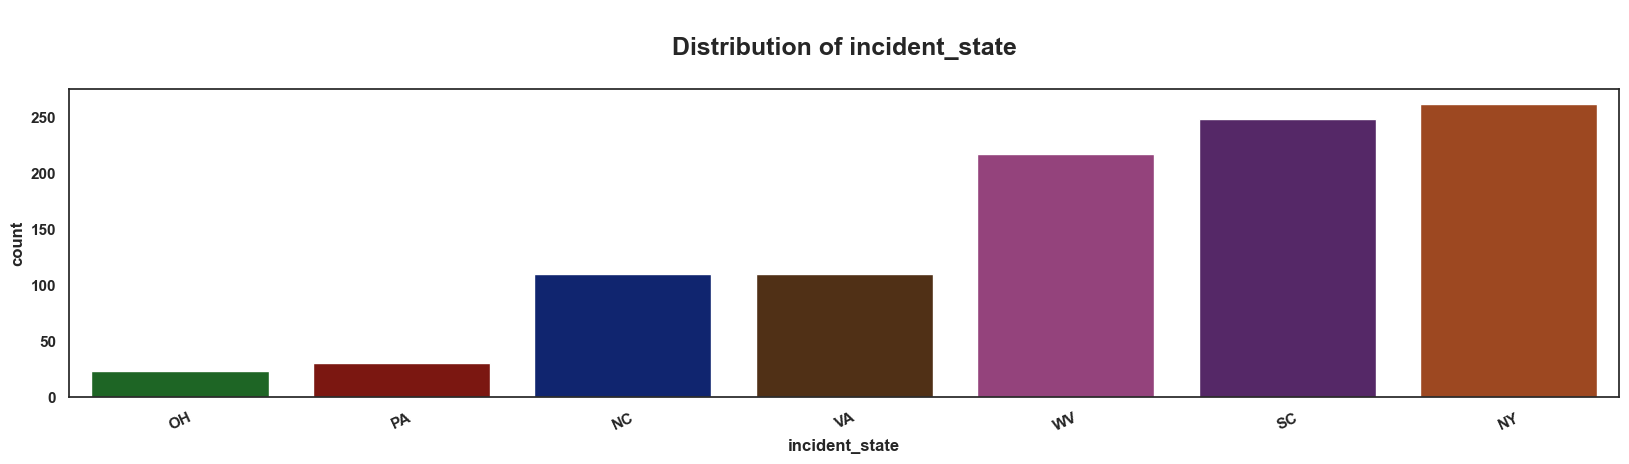

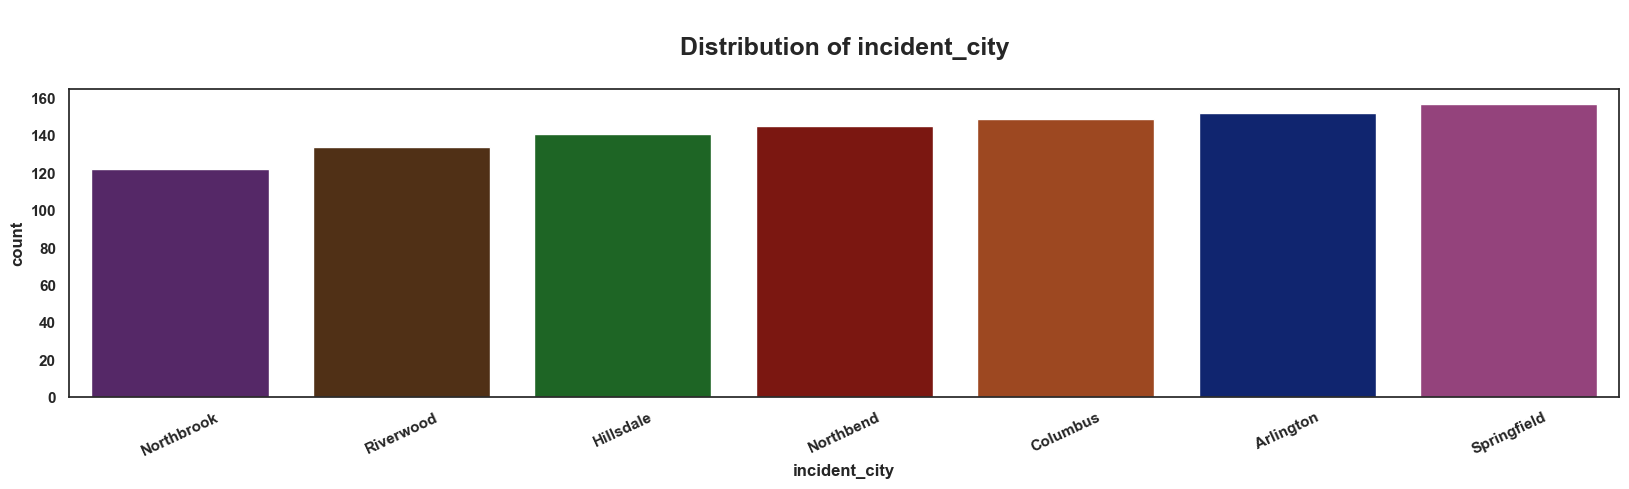

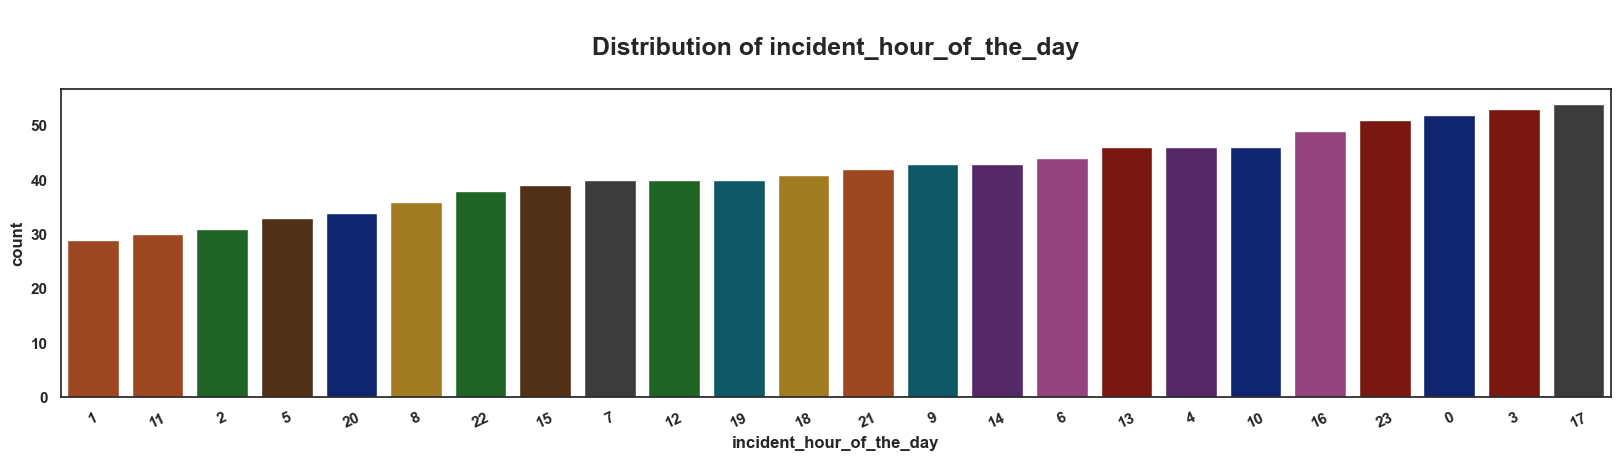

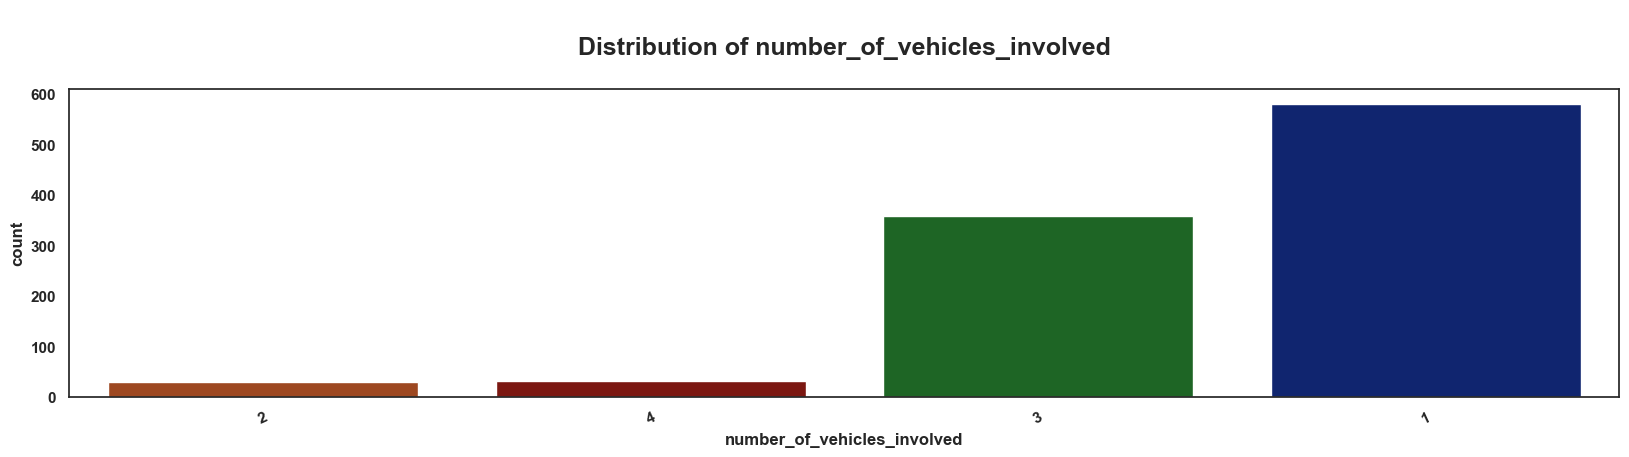

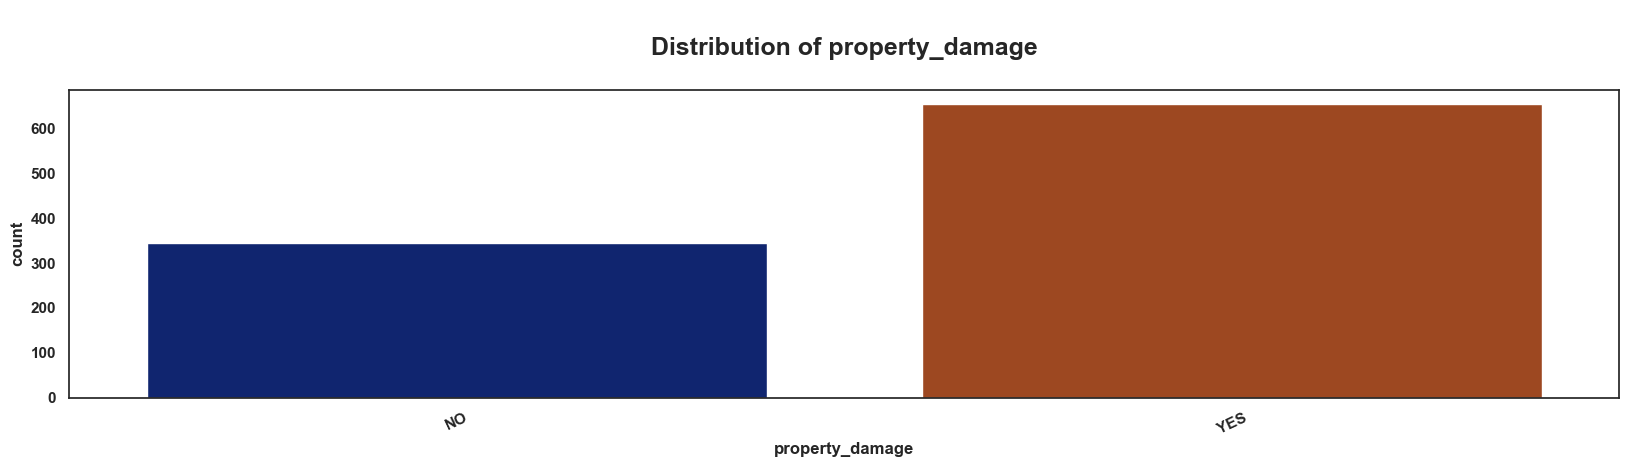

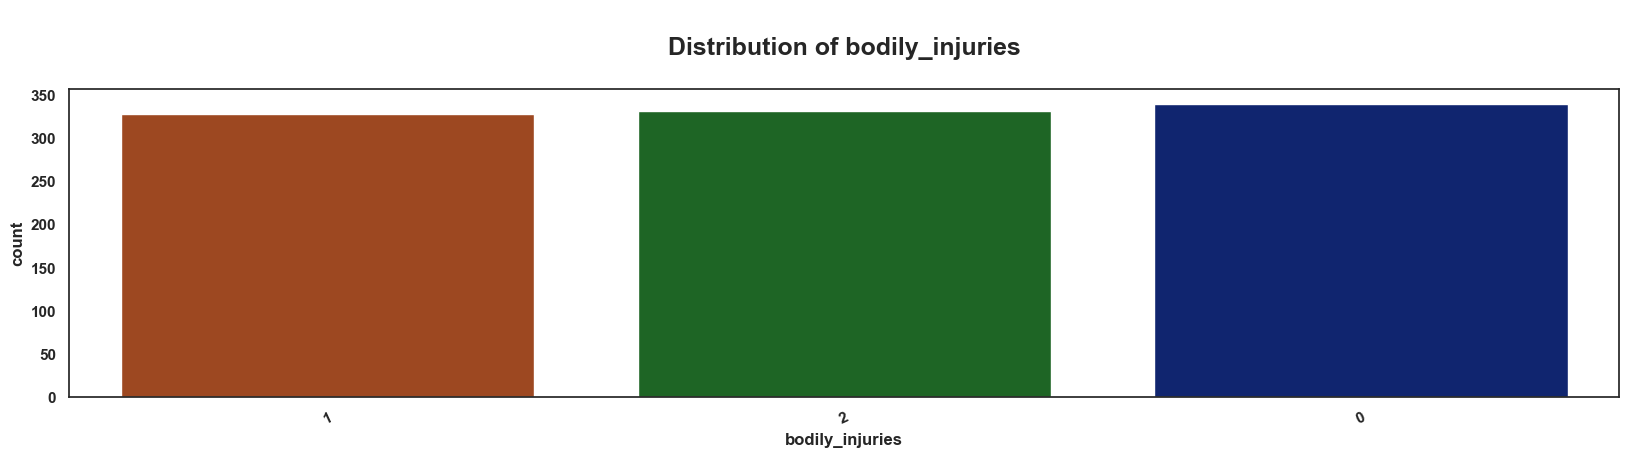

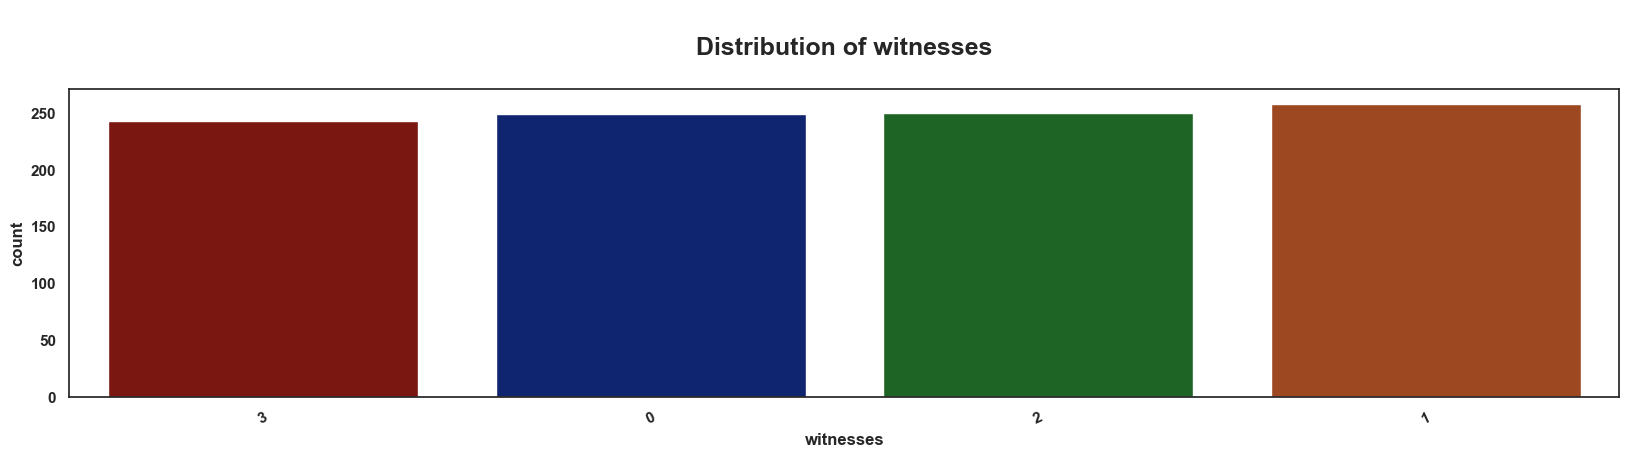

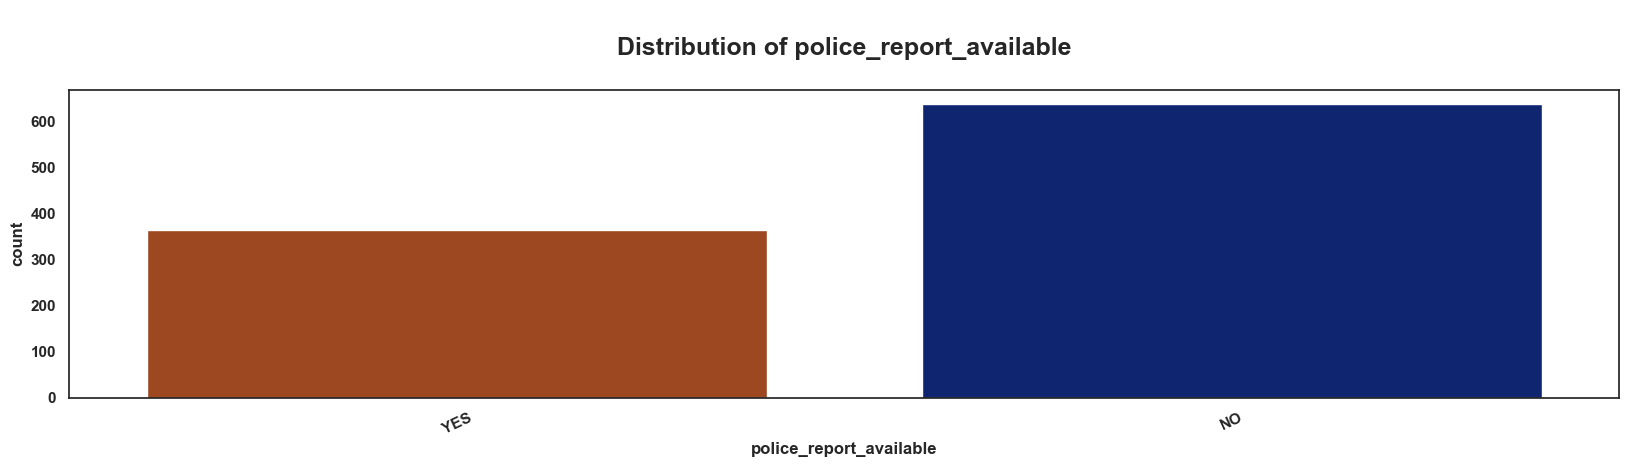

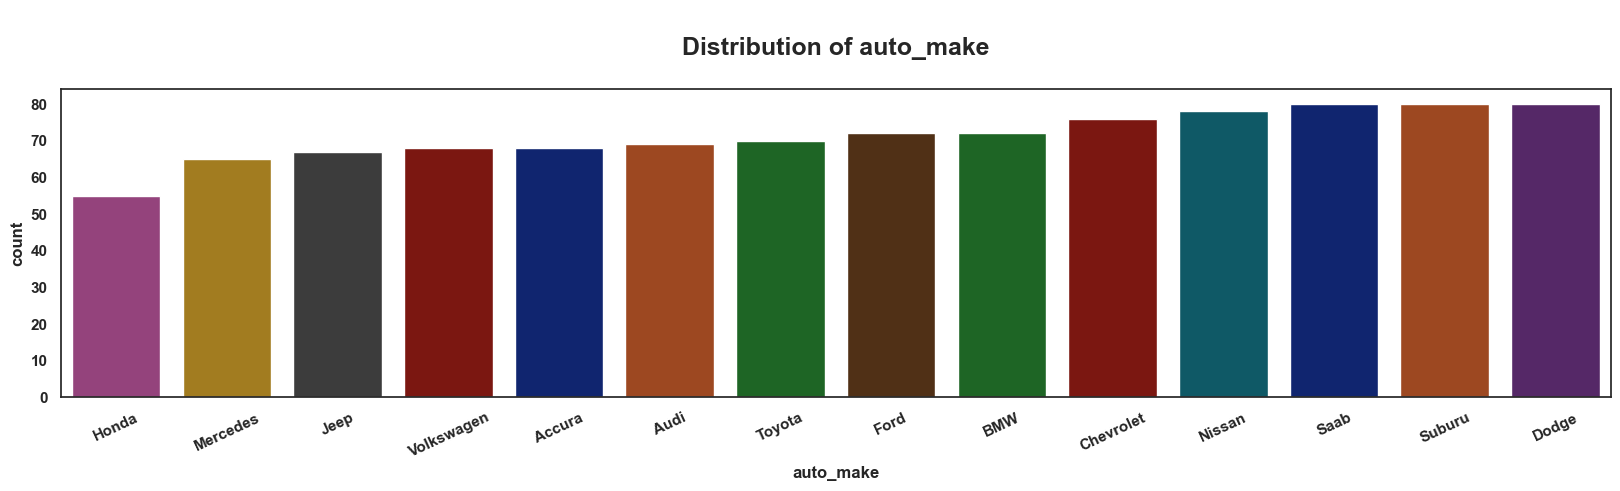

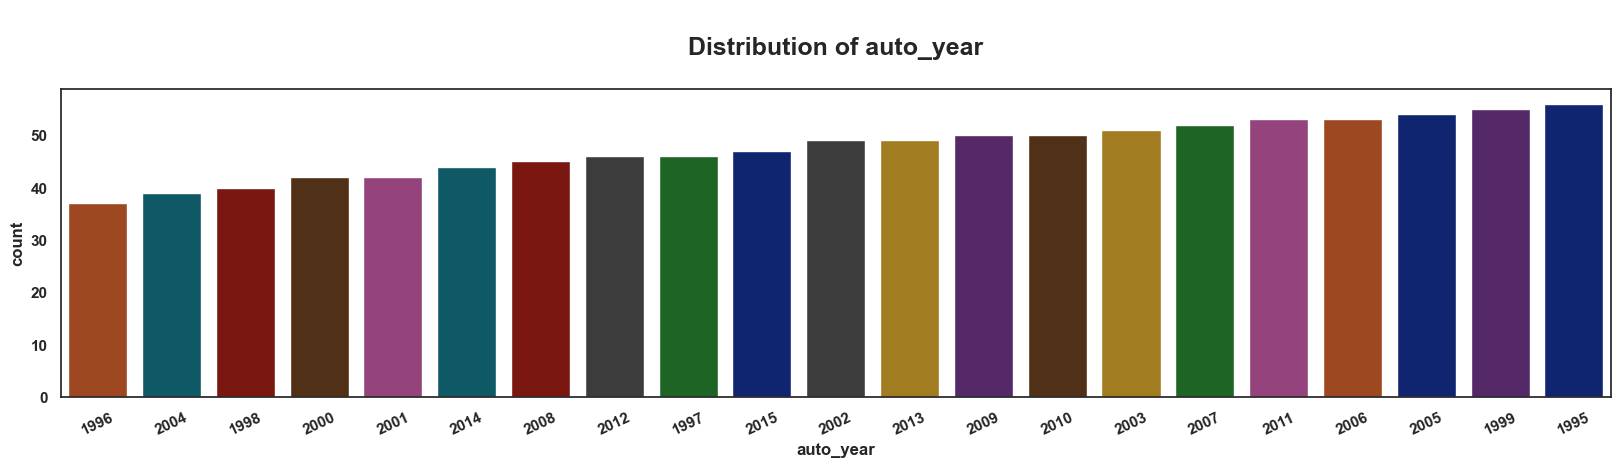

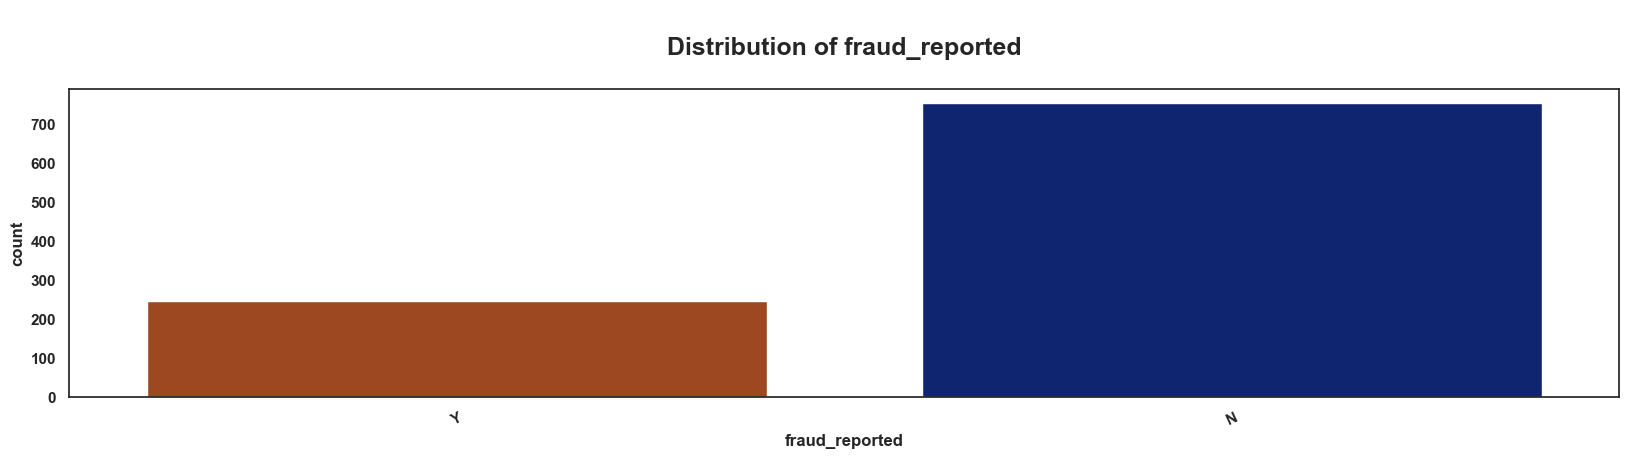

In [15]:
for i in categorical:
    plt.figure(figsize=(20, 4))
    sns.countplot(
        data=df,
        x=df[i],
        hue=i,
        order=df[i].value_counts().index.tolist()[::-1],
        palette="dark",
        legend=False,
    )
    plt.title(
        f"\nDistribution of {i}\n", fontdict={"fontsize": 18, "fontweight": "bold"}
    )
    plt.xticks(rotation=25)
    plt.show()
    plt.close()

#### <span style="color:Khaki;"> Insights from Categorical Variables distribution:</span>

   - <span style="color: Tomato;font-family:calibri;font-size:130%">**Data distribution: -**</span> All categorical features are almost distributed eaqually except - `Incident Type`, `Incident Sevirity`, `Incident State`.

   - <span style="color: Tomato;font-fa mily:calibri;font-size:130%">**Target Variable: -**</span> Our Target variable is biased to Fraud Reported No. Meaning, most of the datapoints are not Fraud. We need to use appropriate technique to balance this otherwise this impact our model.

### <span style="color:Khaki;"> Relationship Numerical Variables VS Classification Target (Fraud):</span>

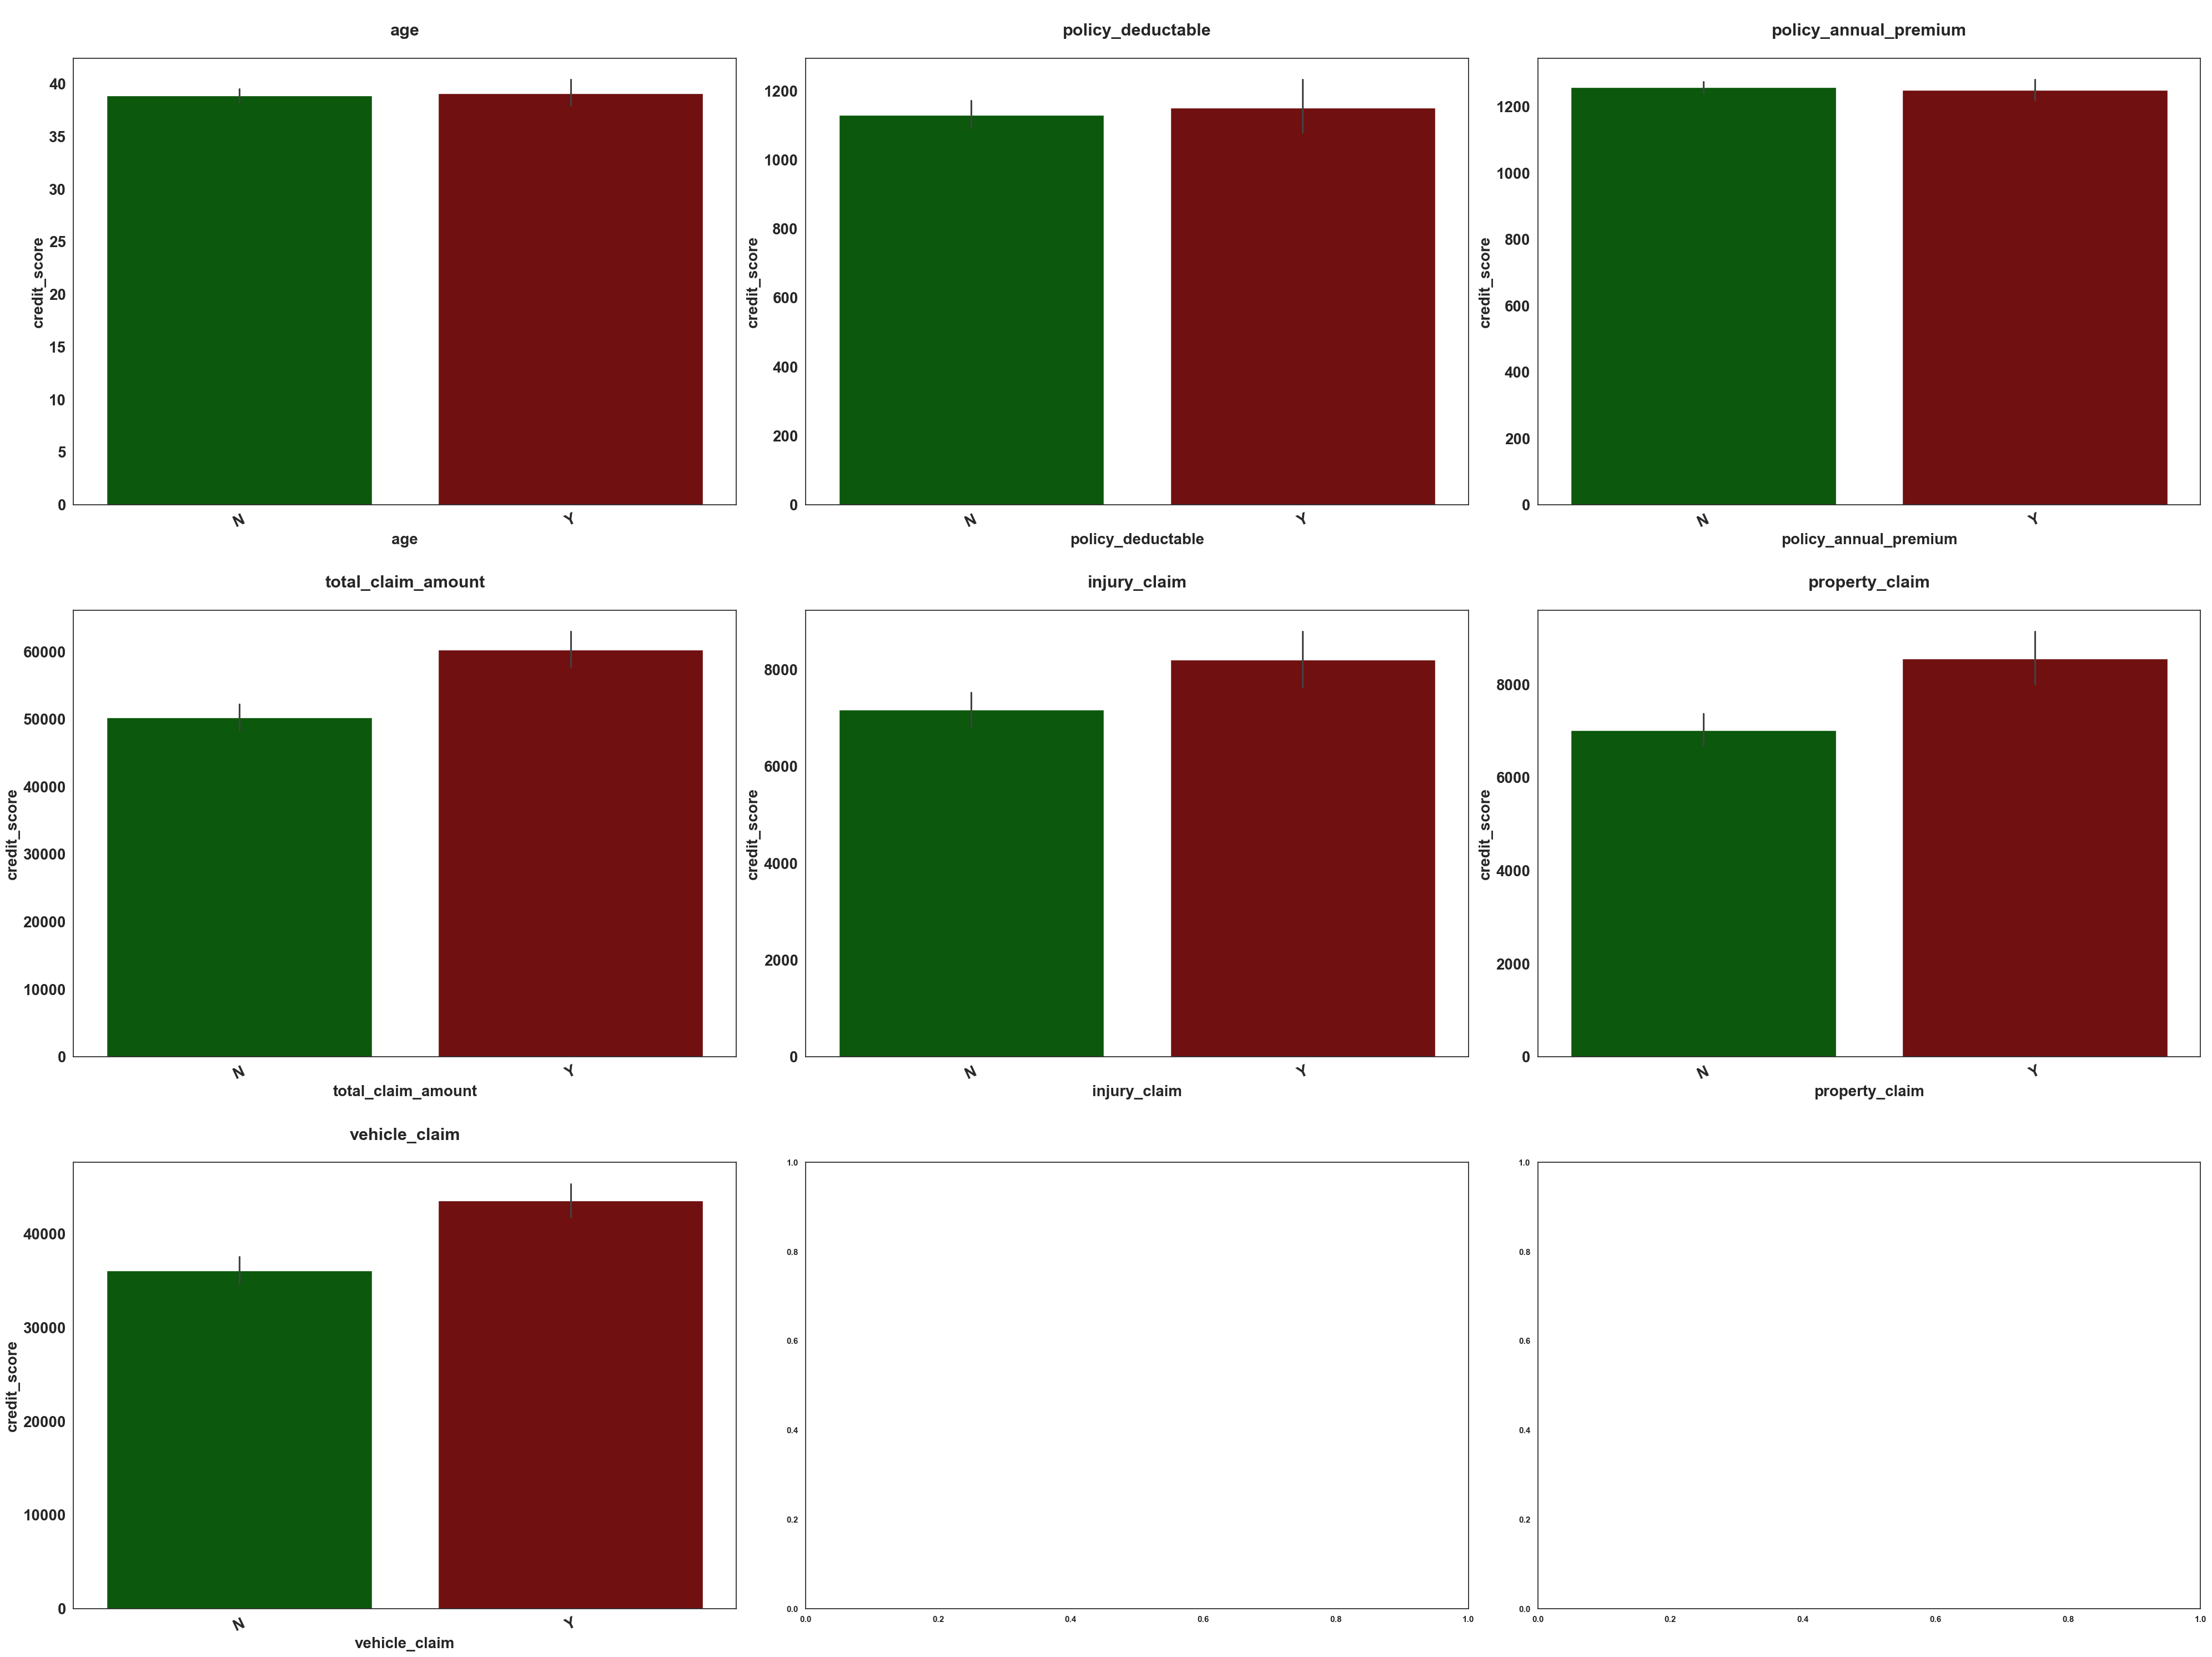

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [16]:
fig, axes = plt.subplots(
    ncols=3, nrows=int(np.ceil(len(continuous) / 3)), figsize=(40, 30)
)


for i, col in enumerate(continuous):
    if i != "fraud_reported":
        sns.barplot(
            data=df,
            y=col,
            x="fraud_reported",
            hue="fraud_reported",
            hue_order=["N", "Y"],
            orient="v",
            palette=["DarkGreen", "maroon"],
            legend=False,
            ax=axes[i // 3, i % 3],
        )
        axes[i // 3, i % 3].set_title(
            col, fontdict={"fontsize": 20, "fontweight": "bold"}
        )
        axes[i // 3, i % 3].tick_params(axis="x", rotation=25)
        axes[i // 3, i % 3].set_title(
            f"\n{col}\n", weight="bold", fontsize=22
        )  # Explicitly set title font weight and size
        axes[i // 3, i % 3].tick_params(
            axis="x", rotation=25, labelsize=20
        )  # Set xtick label size
        axes[i // 3, i % 3].tick_params(axis="y", labelsize=20)  # Set ytick label size
        axes[i // 3, i % 3].set_xlabel(
            col, fontsize=20, weight="bold"
        )  # Set xlabel size and weight
        axes[i // 3, i % 3].set_ylabel(
            "credit_score", fontsize=20, weight="bold"
        )  # Set ylabel size and weight
    plt.close
plt.tight_layout()
plt.show()
plt.close

<span style="color:Chartreuse;font-size:120%;"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#9784; </span> Above plots shows the distribution of our Continuous variables with respect to our Classification Target. </span>

### <span style="color:Khaki;"> Relationship Categorical Variables VS Classification Target (Fraud):</span>

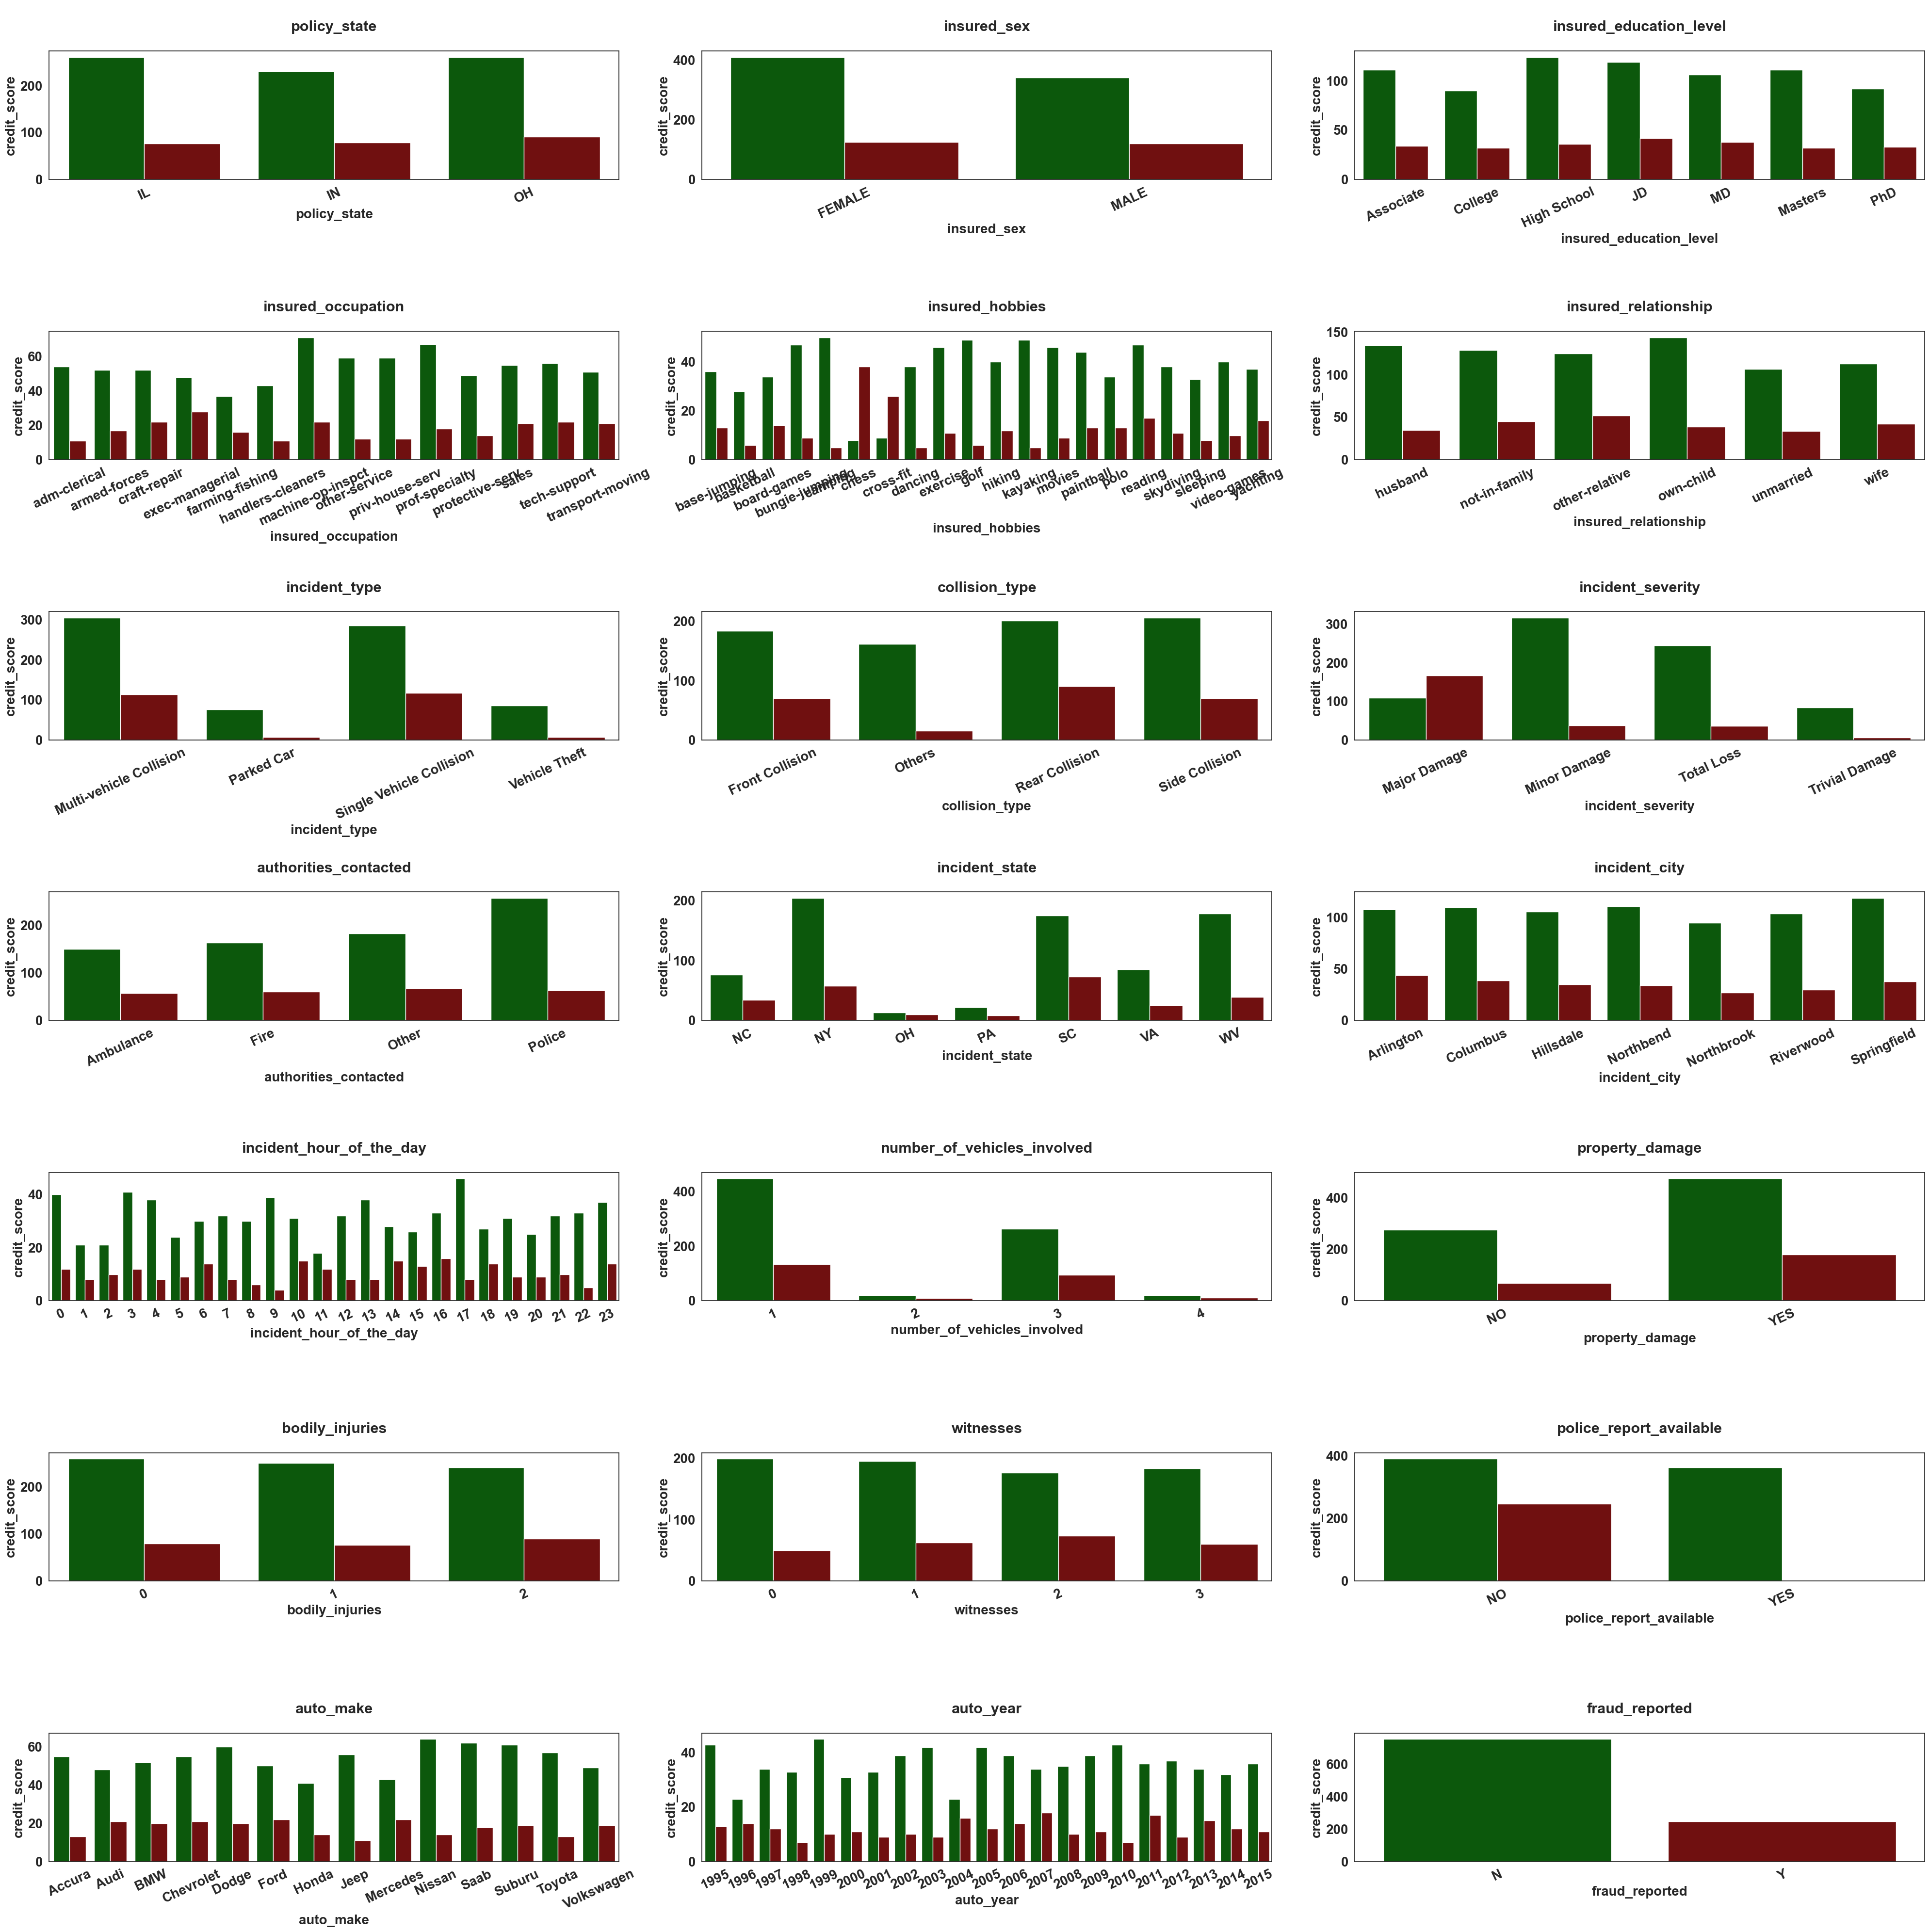

In [17]:
fig, axes = plt.subplots(
    ncols=3, nrows=int(np.ceil(len(categorical) / 3)), figsize=(40, 40)
)

for i, col in enumerate(categorical):
    if i != "fraud_reported":
        sns.countplot(
            data=df,
            x=col,
            hue="fraud_reported",
            hue_order=["N", "Y"],
            palette=["darkgreen", "maroon"],
            legend=False,
            ax=axes[i // 3, i % 3],
        )
        axes[i // 3, i % 3].set_title(
            f"\n{col}\n", weight="bold", fontsize=22
        )  # Explicitly set title font weight and size
        axes[i // 3, i % 3].tick_params(
            axis="x", rotation=25, labelsize=20
        )  # Set xtick label size
        axes[i // 3, i % 3].tick_params(axis="y", labelsize=20)  # Set ytick label size
        axes[i // 3, i % 3].set_xlabel(
            col, fontsize=20, weight="bold"
        )  # Set xlabel size and weight
        axes[i // 3, i % 3].set_ylabel(
            "credit_score", fontsize=20, weight="bold"
        )  # Set ylabel size and weight

plt.tight_layout()
plt.show()

<span style="color:Chartreuse;font-size:120%;"> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#9784; </span> Above plots shows the distribution of our categorical variables with respect to our Classification Target. </span>

In [18]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

### <p Style="color: Khaki">Correlation - Pearson's and Spearman's </p>

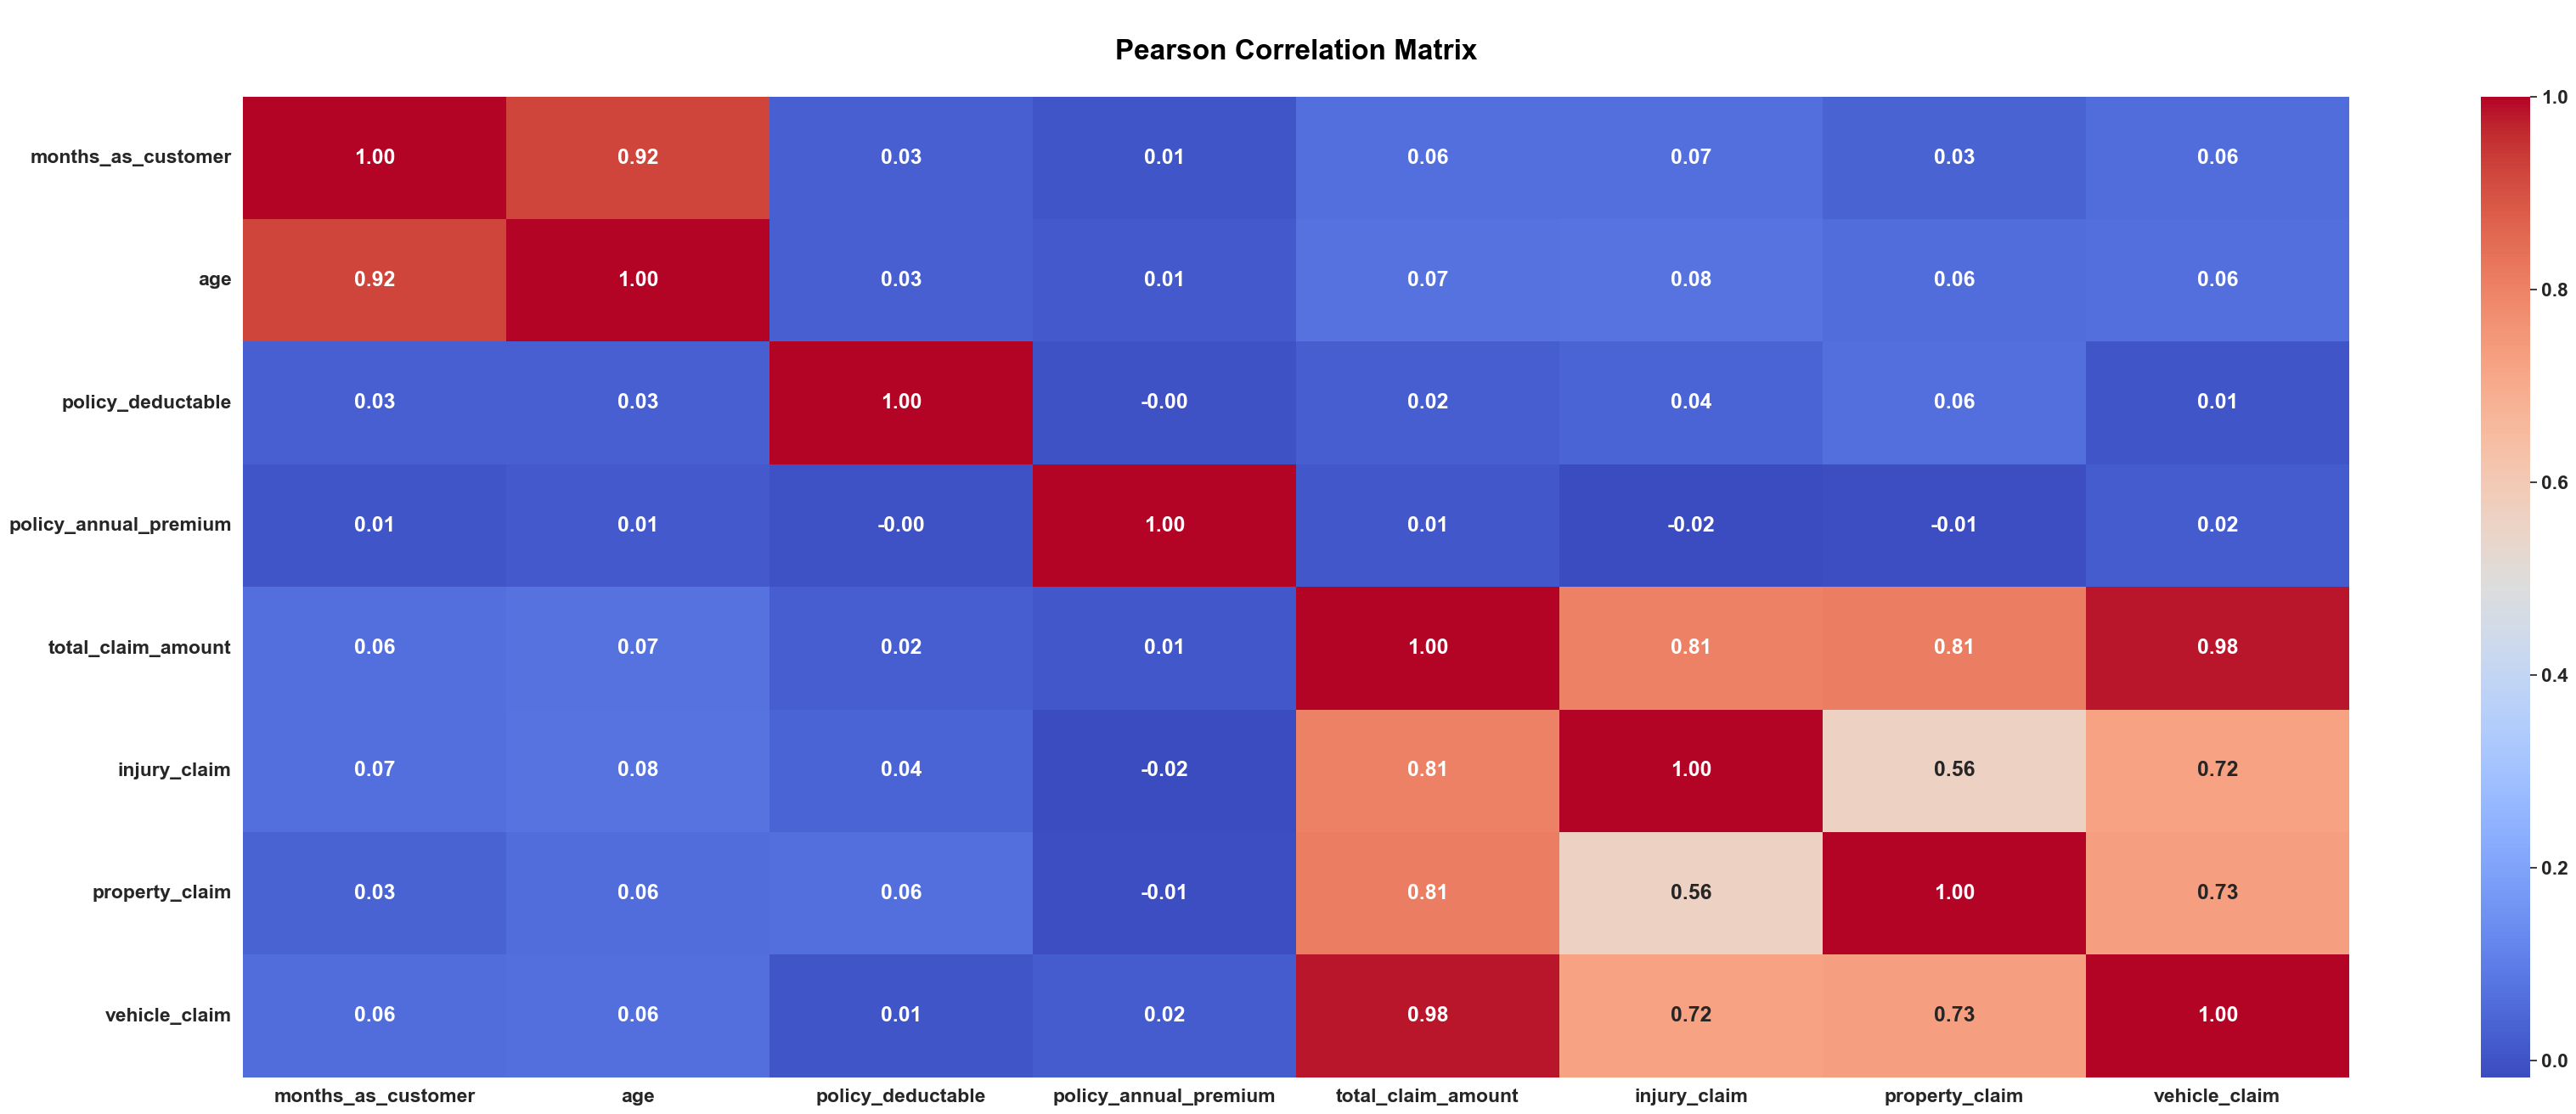

In [19]:
sns.set_theme(font_scale=1.5)

cor_col = df.select_dtypes(include="number")
correlation_matrix_pear = cor_col.corr(method="pearson")
plt.figure(figsize=(40, 15))

sns.heatmap(correlation_matrix_pear, annot=True, fmt=".2f", cmap="coolwarm")
plt.title(
    "\nPearson Correlation Matrix\n",
    fontdict={"fontsize": 24, "color": "black", "fontweight": "bold"},
)
plt.show()

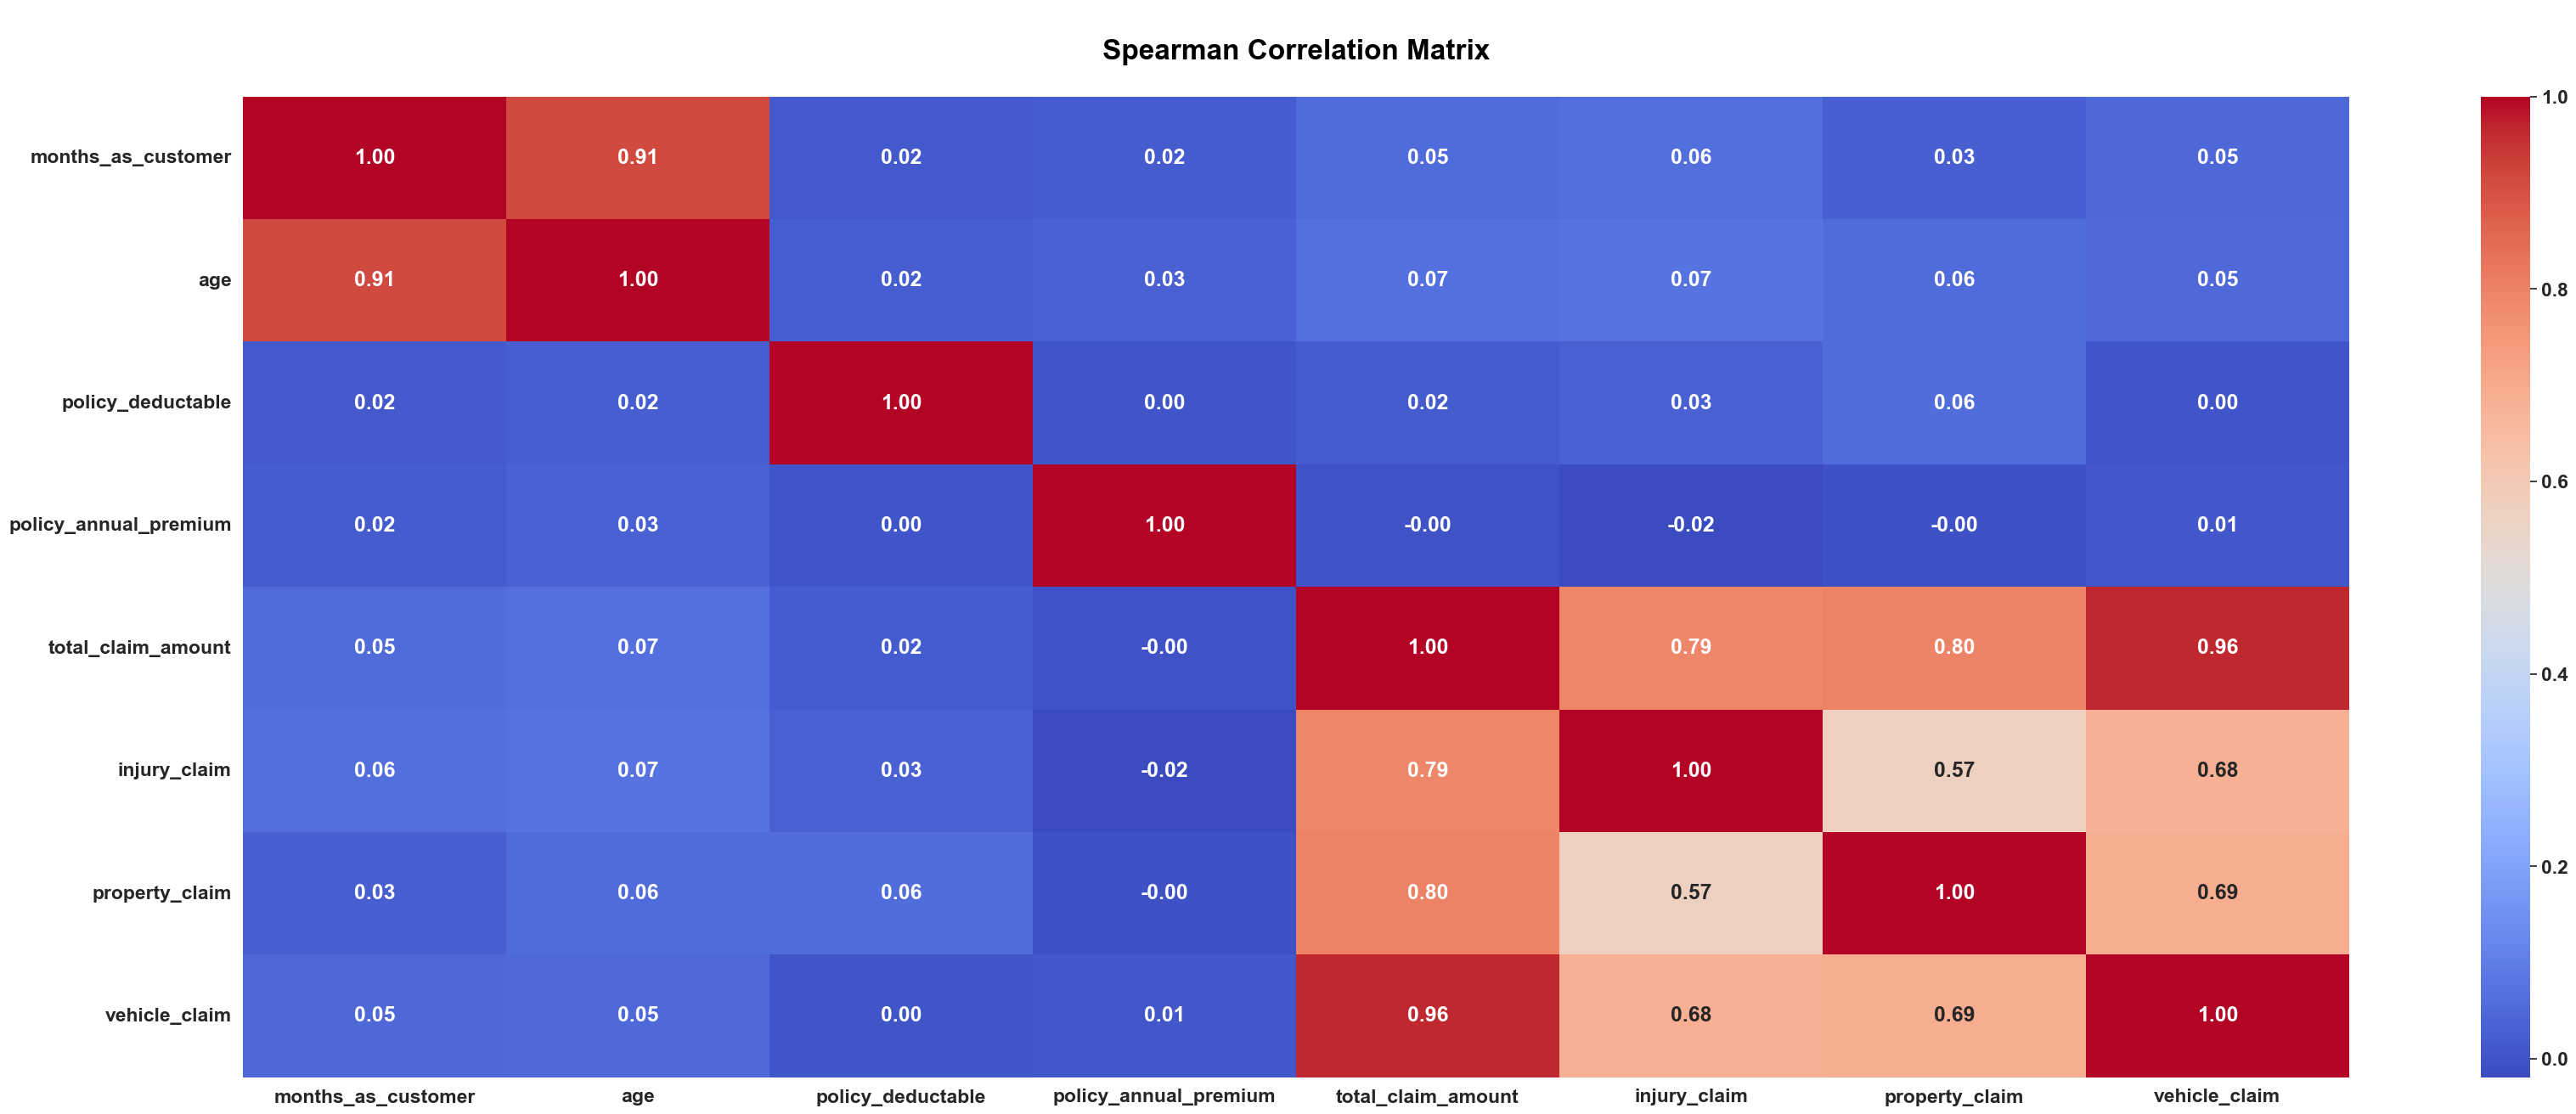

In [20]:
plt.figure(figsize=(40, 15))

cor_col = df.select_dtypes(include="number")
correlation_matrix = cor_col.corr(method="spearman")
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title(
    "\nSpearman Correlation Matrix\n",
    fontdict={"fontsize": 24, "color": "black", "fontweight": "bold"},
)

plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int16         
 1   age                          1000 non-null   int8          
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   category      
 4   policy_deductable            1000 non-null   int16         
 5   policy_annual_premium        1000 non-null   float64       
 6   insured_sex                  1000 non-null   category      
 7   insured_education_level      1000 non-null   category      
 8   insured_occupation           1000 non-null   category      
 9   insured_hobbies              1000 non-null   category      
 10  insured_relationship         1000 non-null   category      
 11  incident_date                1000 non-null  

In [22]:
df.policy_state.value_counts()

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64

In [23]:
df.insured_sex.value_counts()

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64

In [68]:
sns.set_theme(
    context="notebook",
    style="white",
    palette="dark",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None,
)
sns.set_style({"axes.facecolor": "white", "axes.edgecolor": "white"})

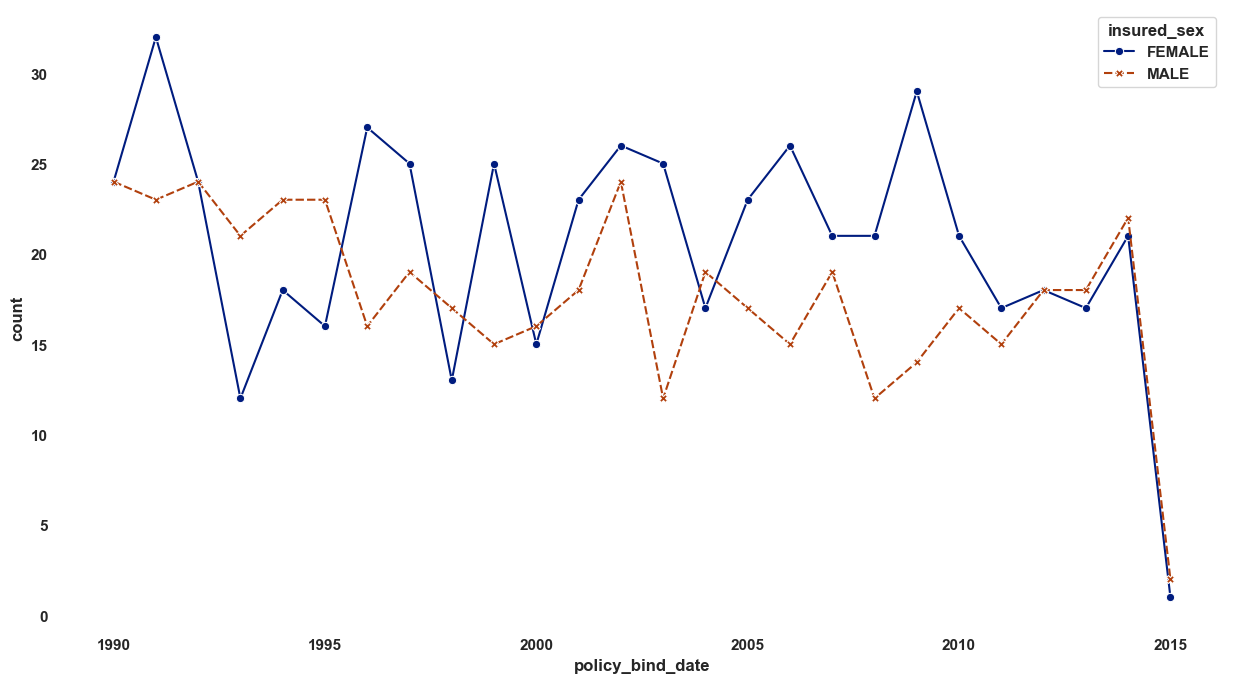

In [69]:
sex = (
    df.groupby([df["policy_bind_date"].dt.year, "insured_sex"], observed=False)["age"]
    .count()
    .reset_index(name="count")
)


plt.figure(figsize=(15, 8))
sns.lineplot(
    data=sex,
    x="policy_bind_date",
    y="count",
    hue="insured_sex",
    style="insured_sex",
    markers=True,
    palette="dark",
)
plt.show()


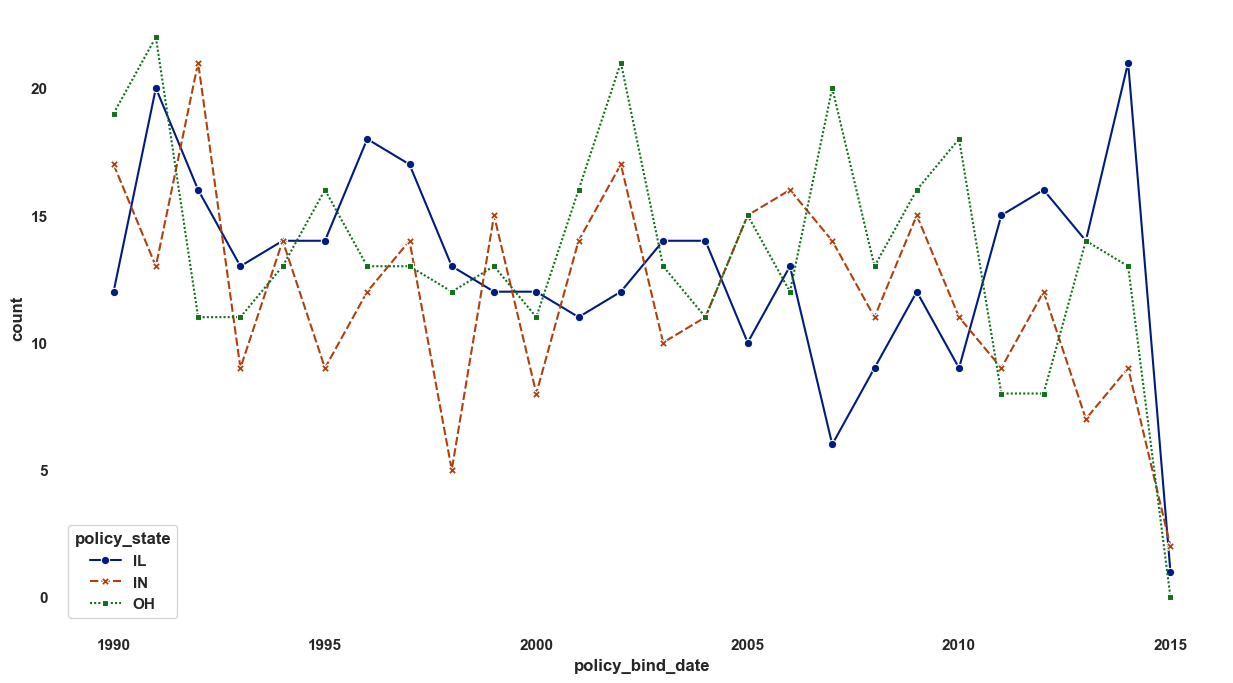

In [70]:
sex = (
    df.groupby([df["policy_bind_date"].dt.year, "policy_state"], observed=False)["age"]
    .count()
    .reset_index(name="count")
)


plt.figure(figsize=(15, 8))
sns.lineplot(
    data=sex,
    x="policy_bind_date",
    y="count",
    hue="policy_state",
    style="policy_state",
    markers=True,
    palette="dark",
)
plt.show()


In [29]:
gender_stats = df.groupby('insured_sex',observed=False)['fraud_reported'].value_counts(normalize=True)

gender_ci = stats.norm.interval(0.95, 
                                  loc=gender_stats.mean(), 
                                  scale=gender_stats.std()/np.sqrt(len(gender_stats)))
gender_ci

(np.float64(0.2144268818400778), np.float64(0.7855731181599221))

In [30]:
df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 20, 30, 45, 60, 100],
                            labels=['<20', '20-30', '30-45', '45-60', '60+'])

In [35]:
age_stats = df.groupby('age_group',observed=False)['fraud_reported'].value_counts(normalize=True)
state_stats = df.groupby('incident_state',observed=False)['fraud_reported'].value_counts(normalize=True)
edu_stats = df.groupby('insured_education_level',observed=False)['fraud_reported'].value_counts(normalize=True)

/tmp/ipykernel_3944/2892695437.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupation_fraud = df.groupby('insured_occupation')['fraud_reported'].value_counts(normalize=True).unstack()


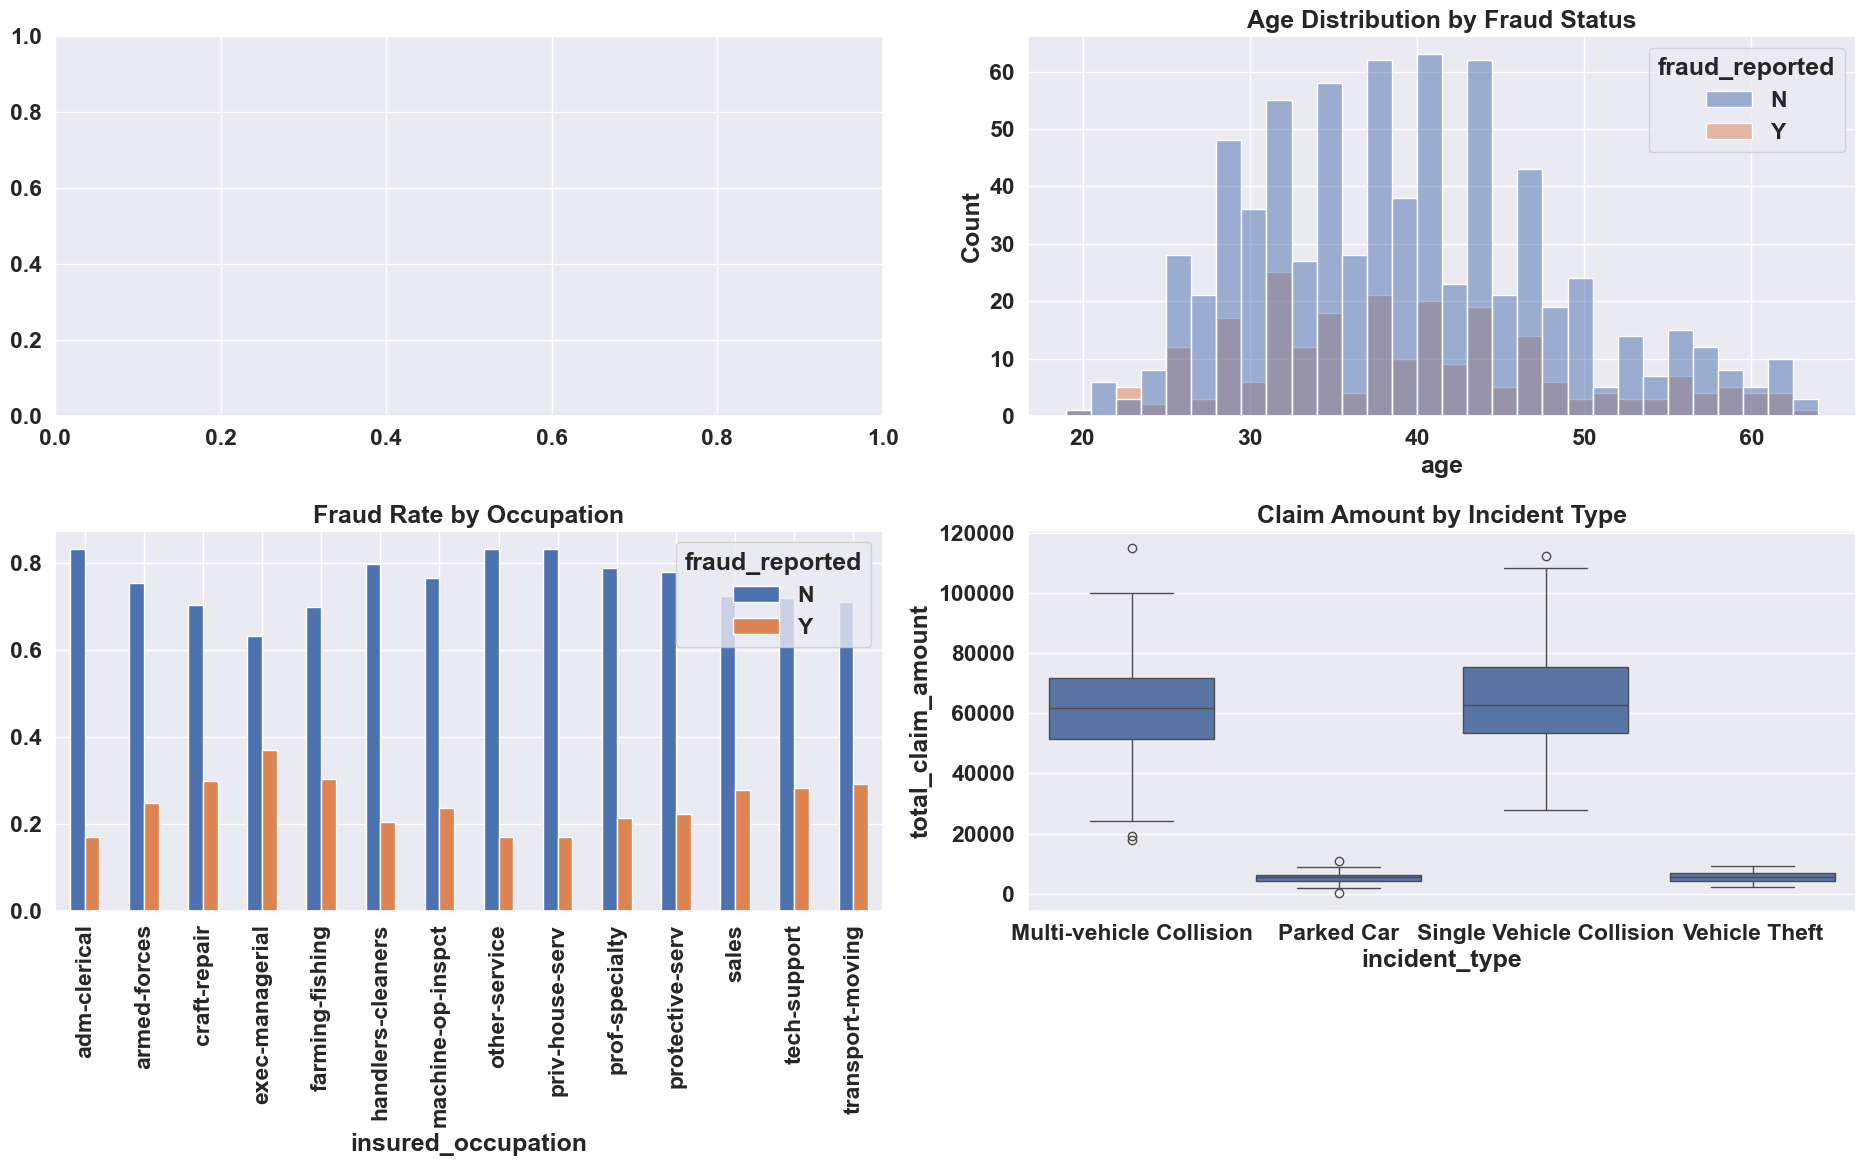

In [46]:
# plt.style.use('')
fig, ax = plt.subplots(2, 2, figsize=(19, 12))
state_counts = df['incident_state'].value_counts()

# sns.heatmap(pd.DataFrame(state_counts).pivot_table(
#     index=state_counts.index,
#     values=state_counts.values
# ), ax=ax[0,0], cmap='YlOrRd')
# ax[0,0].set_title('Incident Distribution by State')

# 2. Age Distribution
sns.histplot(data=df, x='age', hue='fraud_reported', bins=30, ax=ax[0,1])
ax[0,1].set_title('Age Distribution by Fraud Status')

# 3. Professional Category Comparison
occupation_fraud = df.groupby('insured_occupation')['fraud_reported'].value_counts(normalize=True).unstack()
occupation_fraud.plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title('Fraud Rate by Occupation')
ax[1,0].tick_labels = rotation=45

# 4. Claim Amount Distribution
sns.boxplot(data=df, x='incident_type', y='total_claim_amount', ax=ax[1,1])
ax[1,1].set_title('Claim Amount by Incident Type')
ax[1,1].tick_labels = rotation=45

plt.tight_layout()

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from datetime import datetime

def load_and_preprocess_data(df):
    """
    Preprocess the dataset for analysis
    """
    # Convert dates to datetime if not already
    df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
    df['incident_date'] = pd.to_datetime(df['incident_date'])
    
    # Calculate policy duration
    df['policy_duration'] = (df['incident_date'] - df['policy_bind_date']).dt.days
    
    return df

def statistical_validation(df):
    """
    Perform statistical analysis and generate confidence intervals
    """
    results = {}
    
    # Gender analysis
    gender_stats = df.groupby('insured_sex')['fraud_reported'].value_counts(normalize=True)
    gender_ci = stats.norm.interval(0.95, 
                                  loc=gender_stats.mean(), 
                                  scale=gender_stats.std()/np.sqrt(len(gender_stats)))
    
    # Age group analysis
    df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 20, 30, 45, 60, 100],
                            labels=['<20', '20-30', '30-45', '45-60', '60+'])
    age_stats = df.groupby('age_group')['fraud_reported'].value_counts(normalize=True)
    
    # State analysis
    state_stats = df.groupby('incident_state')['fraud_reported'].value_counts(normalize=True)
    
    # Education level analysis
    edu_stats = df.groupby('insured_education_level')['fraud_reported'].value_counts(normalize=True)
    
    results = {
        'gender_stats': gender_stats,
        'gender_ci': gender_ci,
        'age_stats': age_stats,
        'state_stats': state_stats,
        'edu_stats': edu_stats
    }
    
    return results

def create_visualizations(df, results):
    """
    Create various visualizations
    """
    # Set style
    # plt.style.use('seaborn')
    
    # 1. Geographic Heat Map
    fig, ax = plt.subplots(2, 2, figsize=(15, 12))
    
    # State-wise incident counts
    state_counts = df['incident_state'].value_counts()
    # sns.heatmap(pd.DataFrame(state_counts).pivot_table(
    #     index=state_counts.index,
    #     values=state_counts.values
    # ), ax=ax[0,0], cmap='YlOrRd')
    # ax[0,0].set_title('Incident Distribution by State')
    
    # 2. Age Distribution
    sns.histplot(data=df, x='age', hue='fraud_reported', bins=30, ax=ax[0,1])
    ax[0,1].set_title('Age Distribution by Fraud Status')
    
    # 3. Professional Category Comparison
    occupation_fraud = df.groupby('insured_occupation')['fraud_reported'].value_counts(normalize=True).unstack()
    occupation_fraud.plot(kind='bar', ax=ax[1,0])
    ax[1,0].set_title('Fraud Rate by Occupation')
    ax[1,0].tick_labels = rotation=45
    
    # 4. Claim Amount Distribution
    sns.boxplot(data=df, x='incident_type', y='total_claim_amount', ax=ax[1,1])
    ax[1,1].set_title('Claim Amount by Incident Type')
    ax[1,1].tick_labels = rotation=45
    
    plt.tight_layout()
    return fig

def business_impact_analysis(df):
    """
    Analyze business impact and revenue opportunities
    """
    impact = {}
    
    # Average premium by segment
    impact['avg_premium_by_age'] = df.groupby('age_group')['policy_annual_premium'].mean()
    impact['avg_premium_by_occupation'] = df.groupby('insured_occupation')['policy_annual_premium'].mean()
    
    # Claims ratio analysis
    df['claims_ratio'] = df['total_claim_amount'] / df['policy_annual_premium']
    impact['claims_ratio_by_segment'] = df.groupby('insured_occupation')['claims_ratio'].mean()
    
    # Potential revenue opportunity calculation
    market_avg_premium = df['policy_annual_premium'].mean()
    underpriced_segments = df[df['policy_annual_premium'] < market_avg_premium].groupby('insured_occupation').size()
    impact['revenue_opportunities'] = underpriced_segments * (market_avg_premium - df.groupby('insured_occupation')['policy_annual_premium'].mean())
    
    return impact

def generate_recommendations(df, impact):
    """
    Generate actionable recommendations based on analysis
    """
    recommendations = {
        'underserved_segments': [],
        'high_potential_states': [],
        'product_modifications': []
    }
    
    # Identify underserved segments
    coverage_by_occupation = df.groupby('insured_occupation').size() / len(df)
    recommendations['underserved_segments'] = coverage_by_occupation[coverage_by_occupation < coverage_by_occupation.mean()]
    
    # Identify high-potential states
    claims_by_state = df.groupby('incident_state')['total_claim_amount'].mean()
    recommendations['high_potential_states'] = claims_by_state[claims_by_state < claims_by_state.mean()]
    
    # Product modification suggestions
    high_risk_segments = df[df['total_claim_amount'] > df['total_claim_amount'].quantile(0.75)]
    recommendations['product_modifications'] = high_risk_segments.groupby('insured_occupation')['incident_type'].value_counts()
    
    return recommendations

def analyze_research_limitations(df):
    """
    Identify and document research limitations
    """
    limitations = {
        'data_completeness': {},
        'potential_biases': {},
        'further_research': []
    }
    
    # Check for data completeness
    limitations['data_completeness']['missing_values'] = df.isnull().sum()
    limitations['data_completeness']['categorical_representation'] = {
        col: df[col].value_counts(normalize=True) 
        for col in df.select_dtypes(include=['category']).columns
    }
    
    # Identify potential biases
    limitations['potential_biases']['age_distribution'] = df['age'].describe()
    limitations['potential_biases']['geographic_distribution'] = df['incident_state'].value_counts(normalize=True)
    
    # Suggest areas for further research
    limitations['further_research'] = [
        "Impact of weather conditions on incidents",
        "Correlation between vehicle age and claim amount",
        "Effect of safety features on claim frequency",
        "Customer satisfaction analysis",
        "Long-term customer retention patterns"
    ]
    
    return limitations

def main(df):
    """
    Main function to run all analyses
    """
    # Preprocess data
    df = load_and_preprocess_data(df)
    
    # Run analyses
    stats_results = statistical_validation(df)
    visualizations = create_visualizations(df, stats_results)
    business_impact = business_impact_analysis(df)
    recommendations = generate_recommendations(df, business_impact)
    limitations = analyze_research_limitations(df)
    
    return {
        'statistics': stats_results,
        'visualizations': visualizations,
        'business_impact': business_impact,
        'recommendations': recommendations,
        'limitations': limitations
    }


/tmp/ipykernel_3944/552219441.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_stats = df.groupby('insured_sex')['fraud_reported'].value_counts(normalize=True)
/tmp/ipykernel_3944/552219441.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group')['fraud_reported'].value_counts(normalize=True)
/tmp/ipykernel_3944/552219441.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat

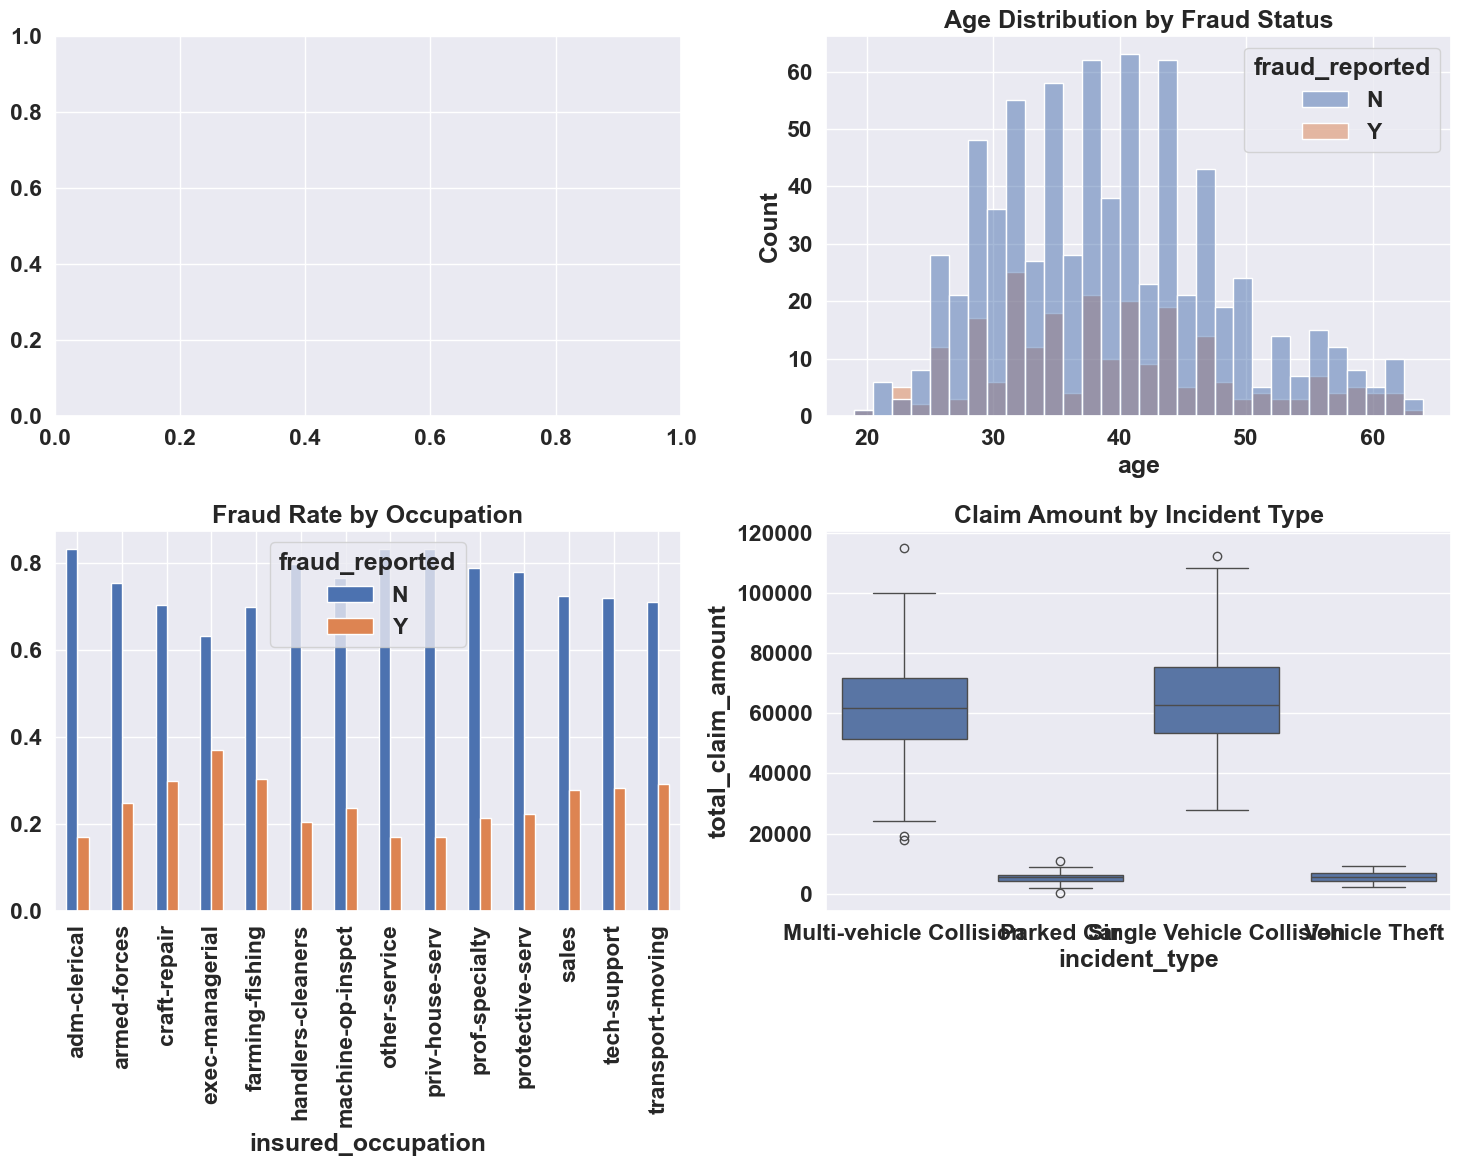

In [57]:

# Example usage:
# df = pd.read_csv('insurance_data.csv')
results = main(df)

In [65]:
print(results['recommendations'])

{'underserved_segments': insured_occupation
adm-clerical        0.0650
armed-forces        0.0690
farming-fishing     0.0530
handlers-cleaners   0.0540
other-service       0.0710
priv-house-serv     0.0710
protective-serv     0.0630
dtype: float64, 'high_potential_states': incident_state
NC   49283.9091
OH   49770.4348
PA   49571.6667
VA   49997.9091
WV   50217.2811
Name: total_claim_amount, dtype: float64, 'product_modifications': insured_occupation  incident_type           
adm-clerical        Single Vehicle Collision     7
                    Multi-vehicle Collision      4
                    Parked Car                   0
                    Vehicle Theft                0
armed-forces        Multi-vehicle Collision      7
                    Single Vehicle Collision     7
                    Parked Car                   0
                    Vehicle Theft                0
craft-repair        Single Vehicle Collision    16
                    Multi-vehicle Collision      3
         

In [62]:
print(results['statistics'])

{'gender_stats': insured_sex  fraud_reported
FEMALE       N                0.7654
             Y                0.2346
MALE         N                0.7387
             Y                0.2613
Name: proportion, dtype: float64, 'gender_ci': (np.float64(0.2144268818400778), np.float64(0.7855731181599221)), 'age_stats': age_group  fraud_reported
<20        N                0.5000
           Y                0.5000
20-30      N                0.7692
           Y                0.2308
30-45      N                0.7534
           Y                0.2466
45-60      N                0.7415
           Y                0.2585
60+        N                0.7222
           Y                0.2778
Name: proportion, dtype: float64, 'state_stats': incident_state  fraud_reported
NC              N                0.6909
                Y                0.3091
NY              N                0.7786
                Y                0.2214
OH              N                0.5652
                Y        

In [67]:
print(results['business_impact'])

{'avg_premium_by_age': age_group
<20     1187.8800
20-30   1244.5107
30-45   1260.5984
45-60   1260.3224
60+     1213.2011
Name: policy_annual_premium, dtype: float64, 'avg_premium_by_occupation': insured_occupation
adm-clerical        1231.0365
armed-forces        1235.5399
craft-repair        1266.0596
exec-managerial     1215.6061
farming-fishing     1278.7266
handlers-cleaners   1292.1607
machine-op-inspct   1222.3788
other-service       1306.8369
priv-house-serv     1256.2948
prof-specialty      1259.6444
protective-serv     1273.2976
sales               1234.5526
tech-support        1260.1514
transport-moving    1283.9439
Name: policy_annual_premium, dtype: float64, 'claims_ratio_by_segment': insured_occupation
adm-clerical        39.6644
armed-forces        43.3612
craft-repair        46.1378
exec-managerial     47.2234
farming-fishing     40.1540
handlers-cleaners   50.1530
machine-op-inspct   45.8591
other-service       39.0300
priv-house-serv     42.7435
prof-specialty      4

In [66]:
print(results['limitations'])

{'data_completeness': {'missing_values': months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
au